# Human Action Detection

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#  Preprocessing imports
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [6]:
# ML Model

from sklearn .linear_model import LogisticRegression
from sklearn .linear_model import Lasso
from sklearn .neighbors import KNeighborsClassifier
from sklearn .svm import SVC
from sklearn .naive_bayes import GaussianNB
from sklearn .tree import DecisionTreeClassifier
from sklearn .ensemble import RandomForestClassifier
import statsmodels.api as sm

In [7]:
# Matrics

from sklearn.metrics import classification_report, r2_score,accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,mean_absolute_error,mean_squared_error

In [8]:
#Data importing 

df = pd.read_csv("mhealth_raw_data.csv")
df

alx     aly      alz       glx      gly      glz     arx     ary  \
0        2.1849 -9.6967  0.63077  0.103900 -0.84053 -0.68762 -8.6499 -4.5781   
1        2.3876 -9.5080  0.68389  0.085343 -0.83865 -0.68369 -8.6275 -4.3198   
2        2.4086 -9.5674  0.68113  0.085343 -0.83865 -0.68369 -8.5055 -4.2772   
3        2.1814 -9.4301  0.55031  0.085343 -0.83865 -0.68369 -8.6279 -4.3163   
4        2.4173 -9.3889  0.71098  0.085343 -0.83865 -0.68369 -8.7008 -4.1459   
...         ...     ...      ...       ...      ...      ...     ...     ...   
1215740  1.7849 -9.8287  0.29725 -0.341370 -0.90056 -0.61493 -3.7198 -8.9071   
1215741  1.8687 -9.8766  0.46236 -0.341370 -0.90056 -0.61493 -3.7160 -8.7455   
1215742  1.6928 -9.9290  0.16631 -0.341370 -0.90056 -0.61493 -3.8824 -9.1155   
1215743  1.5279 -9.6306  0.30458 -0.341370 -0.90056 -0.61493 -3.5564 -9.1441   
1215744  1.6614 -9.8398  0.18088 -0.332100 -0.90432 -0.61886 -3.9035 -8.9324   

              arz       grx      gry       grz  Activity    subject  
0        0.187760 -0.449020 -1.01030  0.034483         0   subject1  
1        0.023595 -0.449020 -1.01030  0.034483         0   subject1  
2        0.275720 -0.449020 -1.01030  0.034483         0   subject1  
3        0.367520 -0.456860 -1.00820  0.025862         0   subject1  
4        0.407290 -0.456860 -1.00820  0.025862         0   subject1  
...           ...       ...      ...       ...       ...        ...  
1215740  0.294230  0.041176 -0.99384 -0.480600         0  subject10  
1215741  0.448140  0.041176 -0.99384 -0.480600         0  subject10  
1215742  0.450480  0.041176 -0.99384 -0.480600         0  subject10  
1215743  0.594880  0.041176 -0.99384 -0.480600         0  subject10  
1215744  0.761710  0.035294 -1.02050 -0.471980         0  subject10  

[1215745 rows x 14 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [10]:
df.describe().T

count      mean       std      min       25%       50%  \
alx       1215745.0  1.494200  3.826485 -22.1460   0.14131  1.308900   
aly       1215745.0 -9.692878  4.171303 -19.6190 -10.20100 -9.670300   
alz       1215745.0 -0.954806  5.461803 -19.3730  -2.64940 -0.016456   
glx       1215745.0 -0.001599  0.491217  -2.1466  -0.43599 -0.014842   
gly       1215745.0 -0.616632  0.354641  -7.7899  -0.81801 -0.707320   
glz       1215745.0 -0.158781  0.546798  -2.6267  -0.59332 -0.190570   
arx       1215745.0 -3.713413  4.763586 -22.3610  -6.07600 -2.977600   
ary       1215745.0 -5.805526  5.757639 -18.9720  -9.40420 -7.461500   
arz       1215745.0  2.393880  3.876503 -18.2390   0.12965  1.928100   
grx       1215745.0 -0.276106  0.527689  -8.3392  -0.70588 -0.354900   
gry       1215745.0 -0.466434  0.555551  -3.5708  -0.89733 -0.634500   
grz       1215745.0  0.266633  0.564380  -2.6897  -0.23707  0.301720   
Activity  1215745.0  1.741465  3.283679   0.0000   0.00000  0.000000   

               75%      max  
alx       2.575800  20.0540  
aly      -9.042200  21.1610  
alz       1.301300  25.0150  
glx       0.448980  60.4840  
gly      -0.540340   2.0113  
glz       0.322200   2.7701  
arx      -1.193700  19.8640  
ary      -2.533900  22.1910  
arz       4.914700  25.7410  
grx       0.096078   3.3196  
gry      -0.106780   1.5565  
grz       0.778020   2.7500  
Activity  2.000000  12.0000

In [11]:
df.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [12]:
df.duplicated().sum()

0

<Axes: xlabel='Activity'>

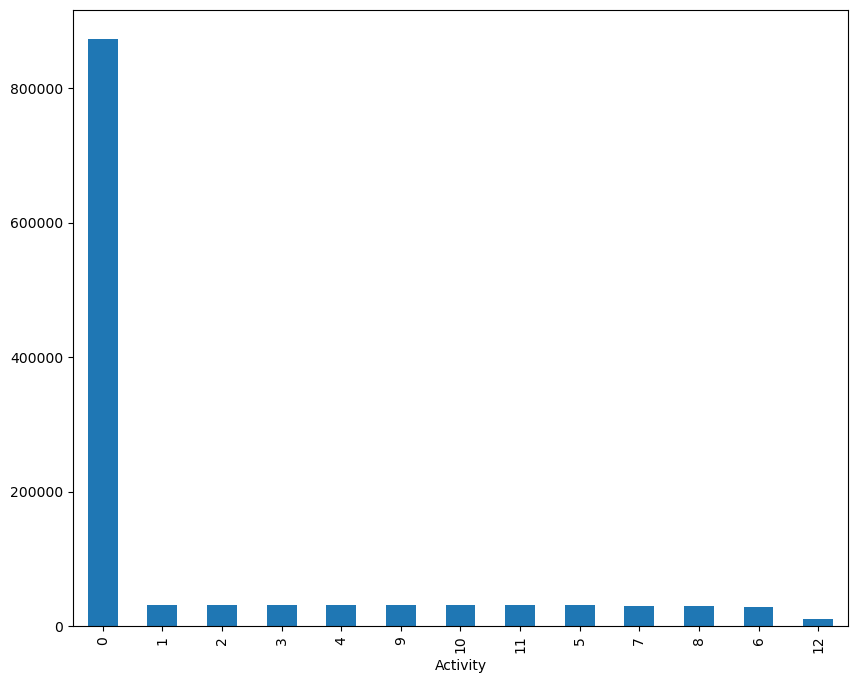

In [13]:
plt.figure(figsize =(10,8))
df['Activity'].value_counts().plot.bar()

In [14]:
data_activity_0 = df[df['Activity']==0]
data_activity_else = df[df['Activity']!=0]

In [15]:
data_activity_0 = data_activity_0.sample(n=40000)
df = pd.concat([data_activity_0 , data_activity_else])

<Axes: xlabel='Activity'>

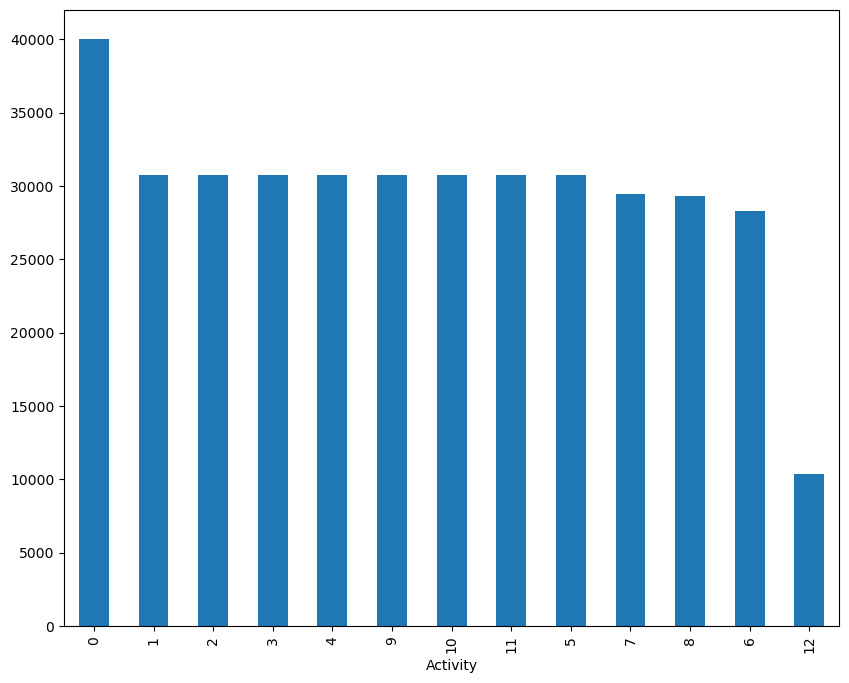

In [16]:
plt.figure(figsize =(10,8))
df['Activity'].value_counts().plot.bar()

In [17]:
# EDA

activity_label ={
0: "None",
1:   "Standing still (1 min)",
2:   "Sitting and relaxing (1 min)",
3:   "Lying down (1 min)",
4:   "Walking (1 min)",
5:   "Climbing stairs (1 min)",
6:   "Waist bends forward (20x)",
7:   "Frontal elevation of arms (20x)",
8:   "Knees bending (crouching) (20x)",
9:   "Cycling (1 min)",
10 : " Jogging (1 min)",
11 : " Running (1 min)",
12 : " Jump front & back (20x)",
}

=========================================================== Standing still (1 min) - a===========================================================


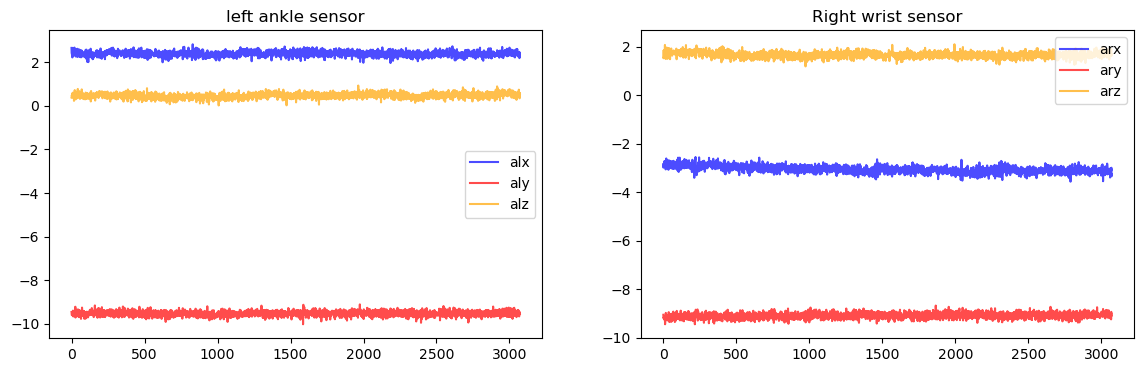

=========================================================== Standing still (1 min) - g===========================================================


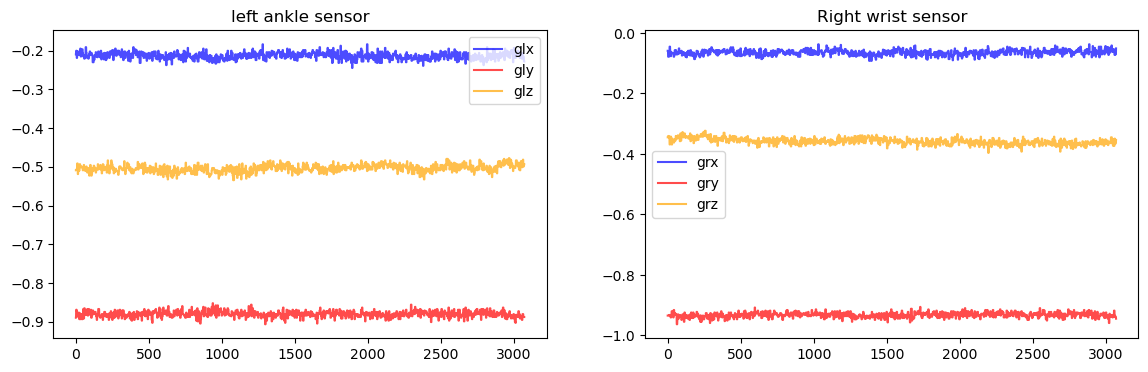

=========================================================== Sitting and relaxing (1 min) - a===========================================================


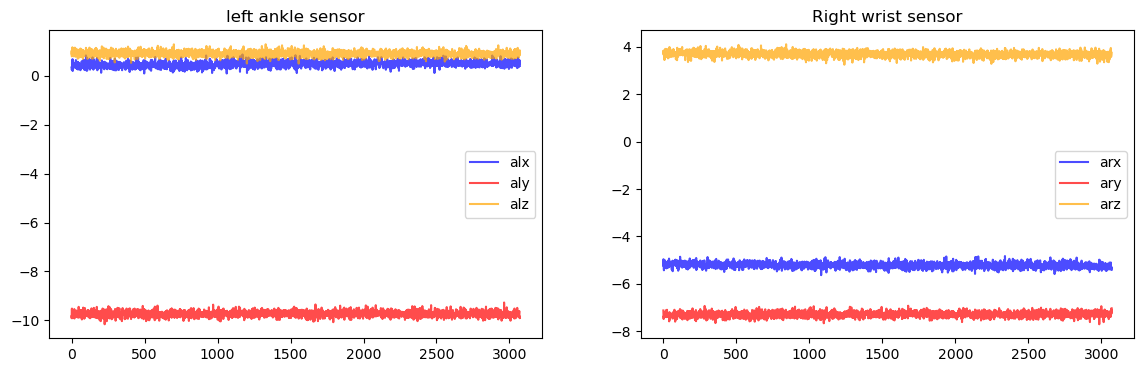

=========================================================== Sitting and relaxing (1 min) - g===========================================================


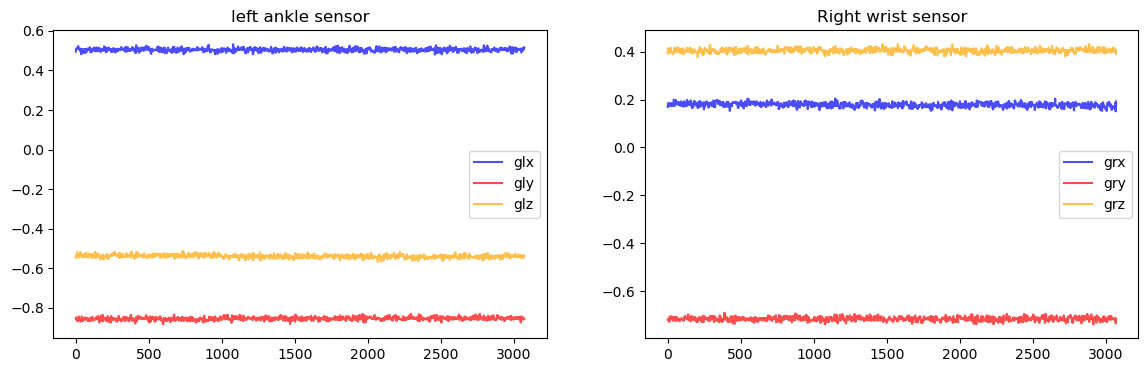

=========================================================== Lying down (1 min) - a===========================================================


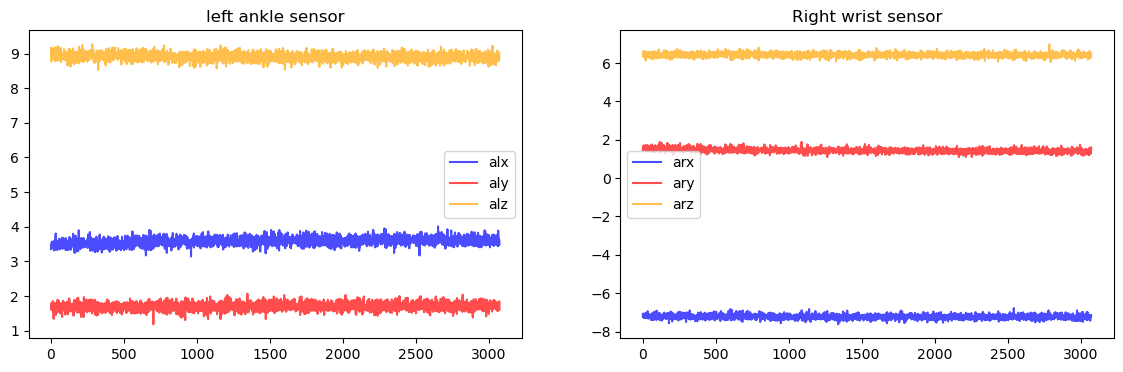

=========================================================== Lying down (1 min) - g===========================================================


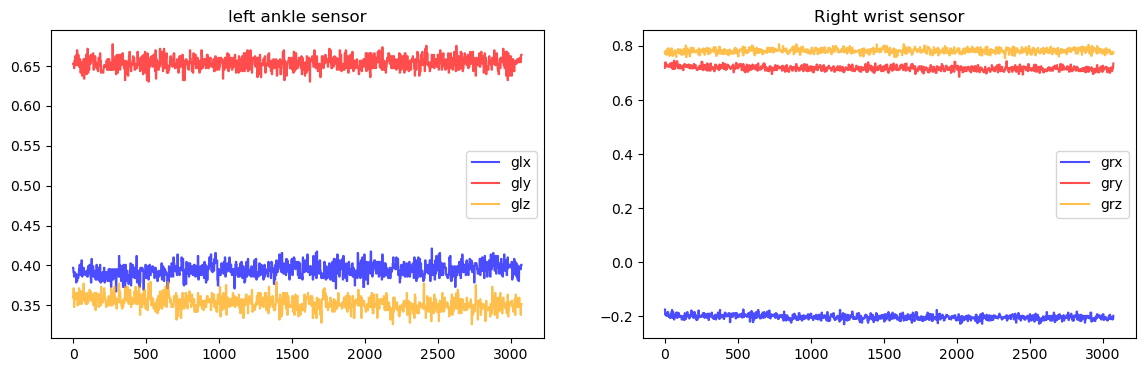

=========================================================== Walking (1 min) - a===========================================================


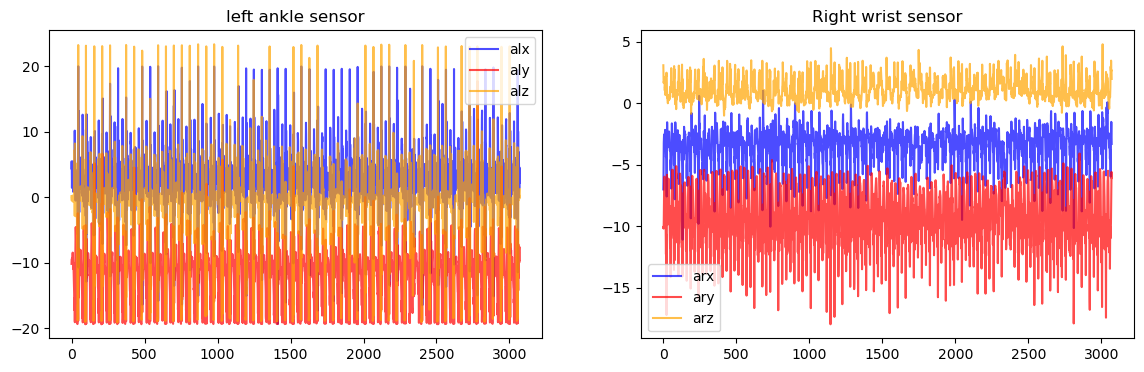

=========================================================== Walking (1 min) - g===========================================================


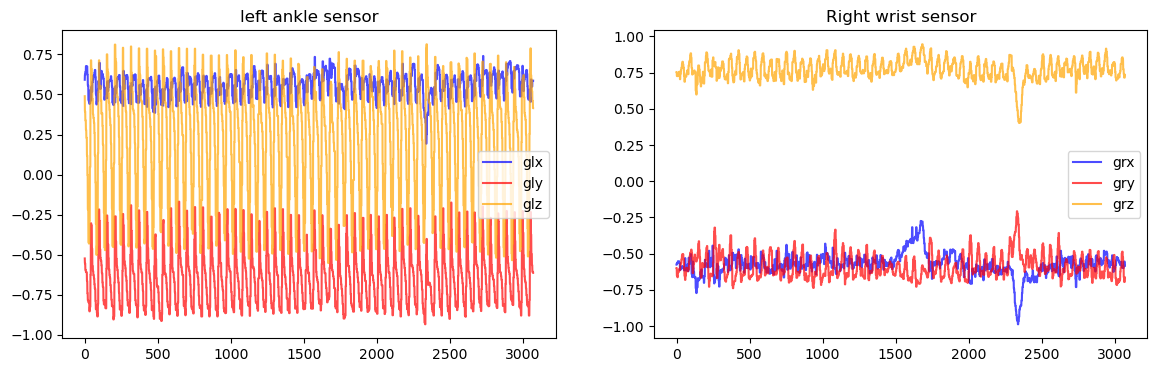

=========================================================== Climbing stairs (1 min) - a===========================================================


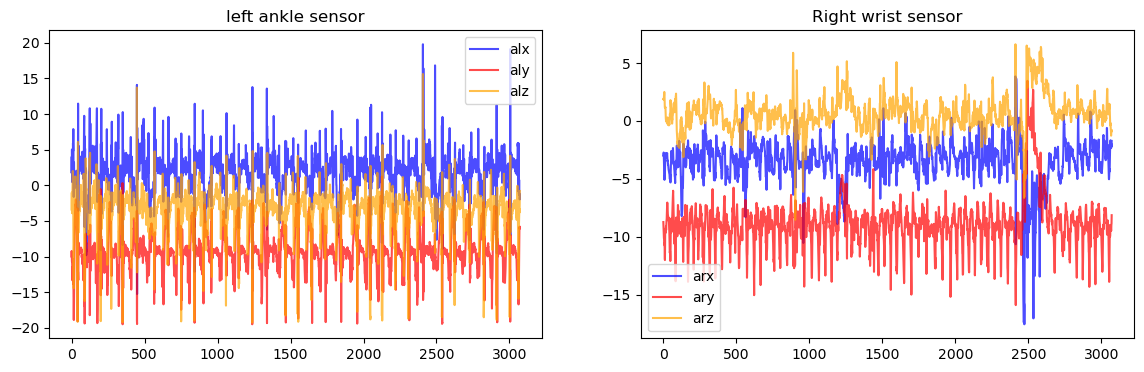

=========================================================== Climbing stairs (1 min) - g===========================================================


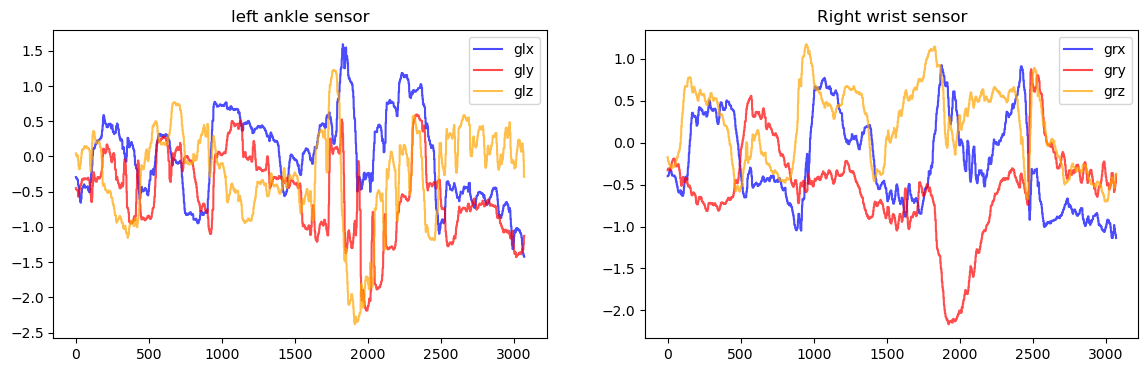

=========================================================== Waist bends forward (20x) - a===========================================================


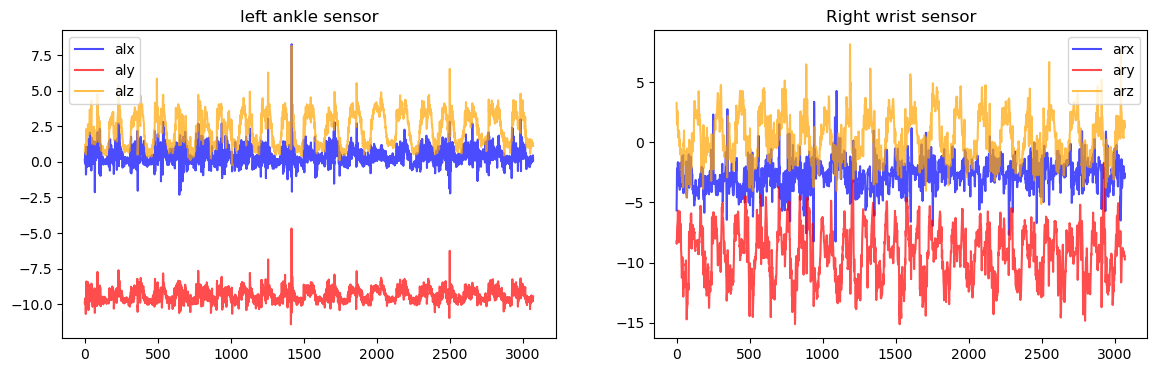

=========================================================== Waist bends forward (20x) - g===========================================================


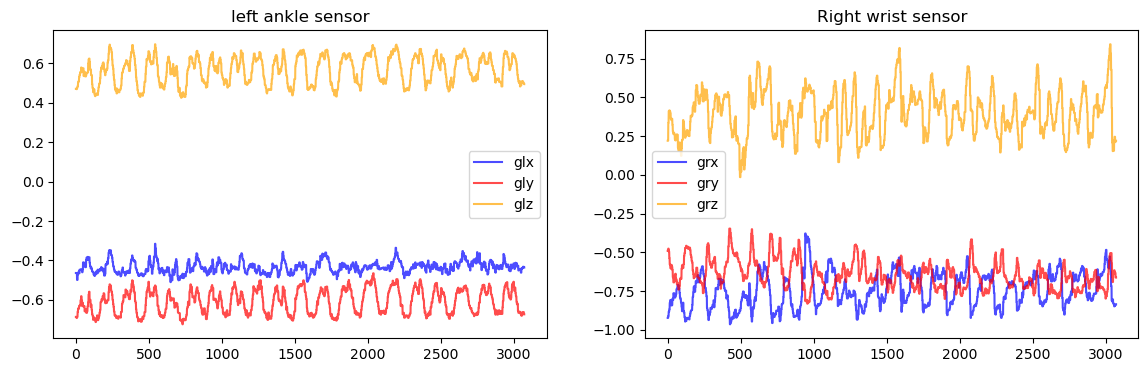

=========================================================== Frontal elevation of arms (20x) - a===========================================================


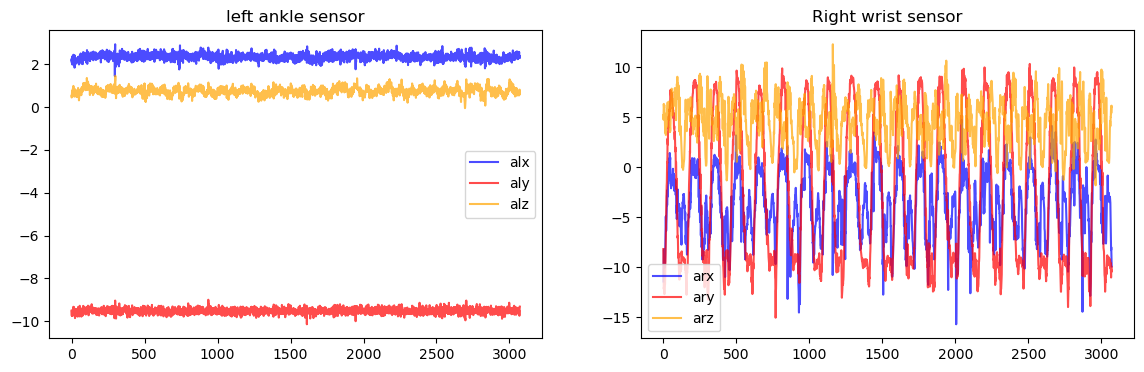

=========================================================== Frontal elevation of arms (20x) - g===========================================================


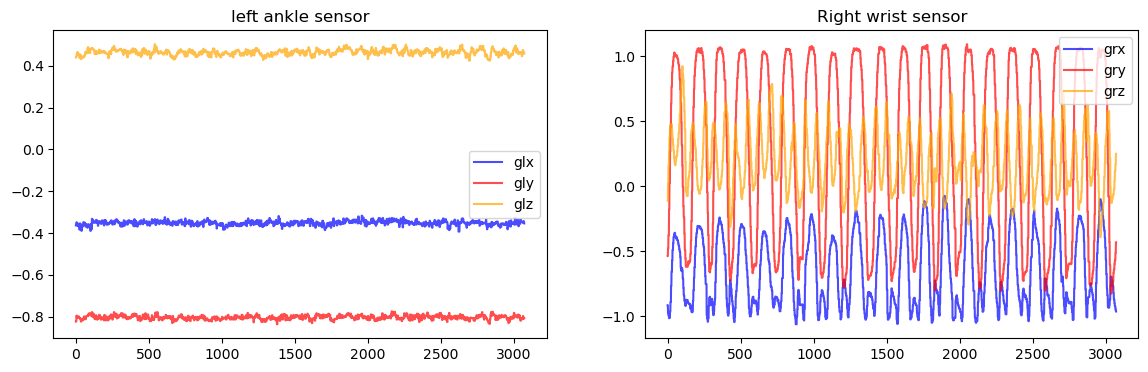

=========================================================== Knees bending (crouching) (20x) - a===========================================================


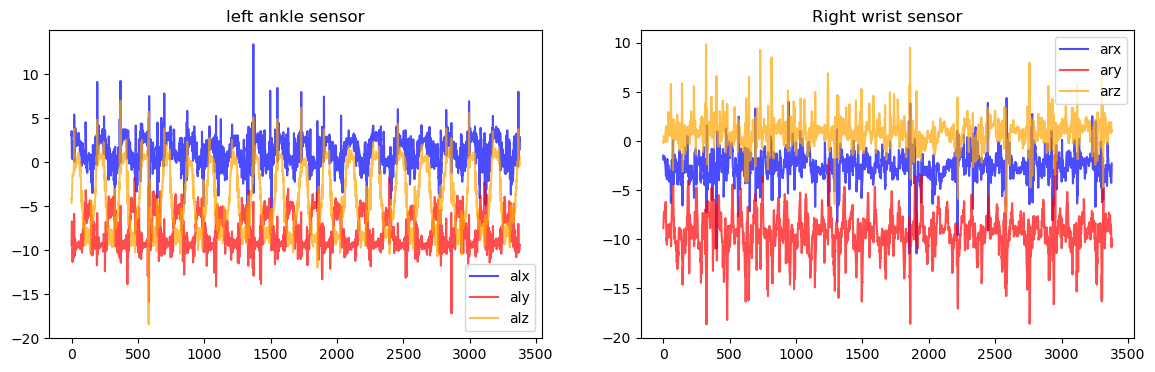

=========================================================== Knees bending (crouching) (20x) - g===========================================================


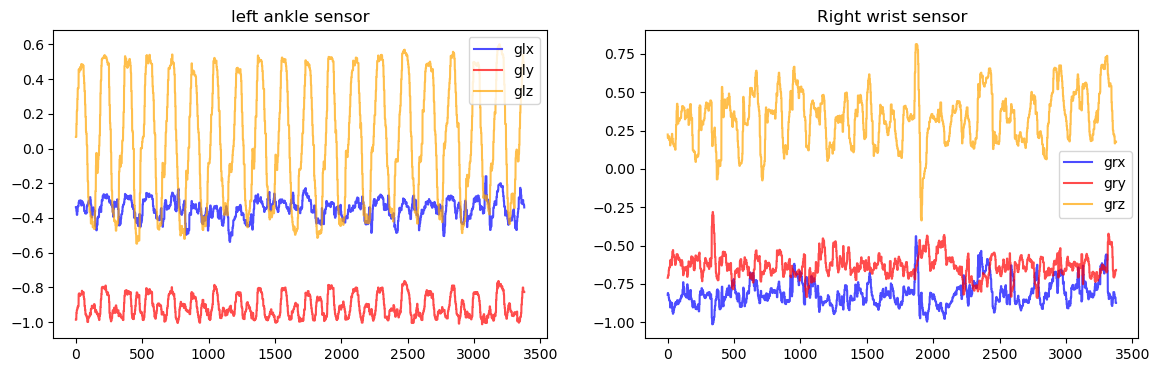

=========================================================== Cycling (1 min) - a===========================================================


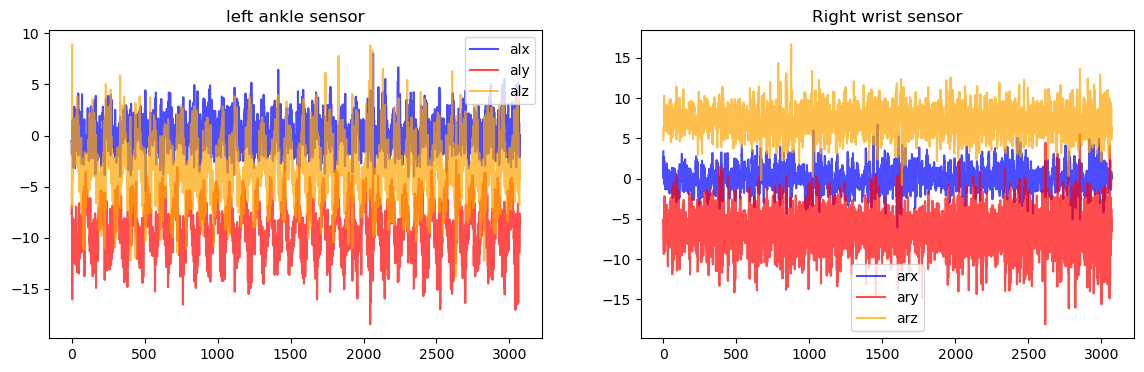

=========================================================== Cycling (1 min) - g===========================================================


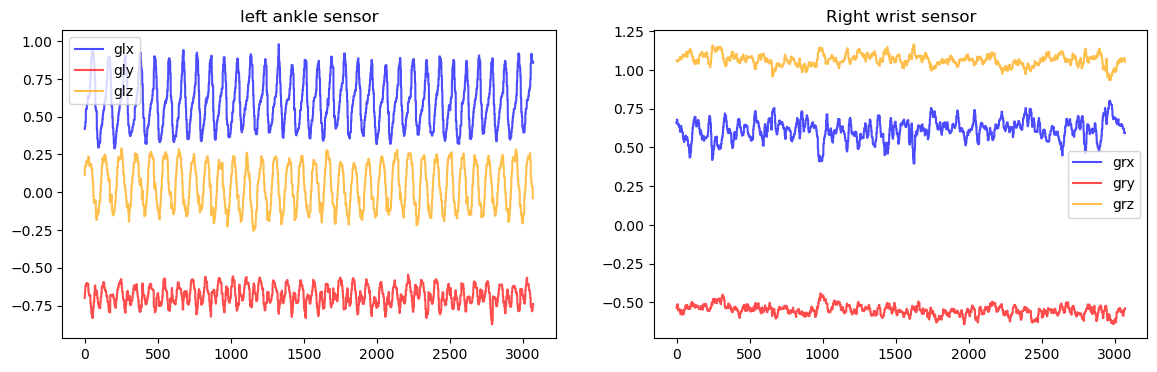

===========================================================  Jogging (1 min) - a===========================================================


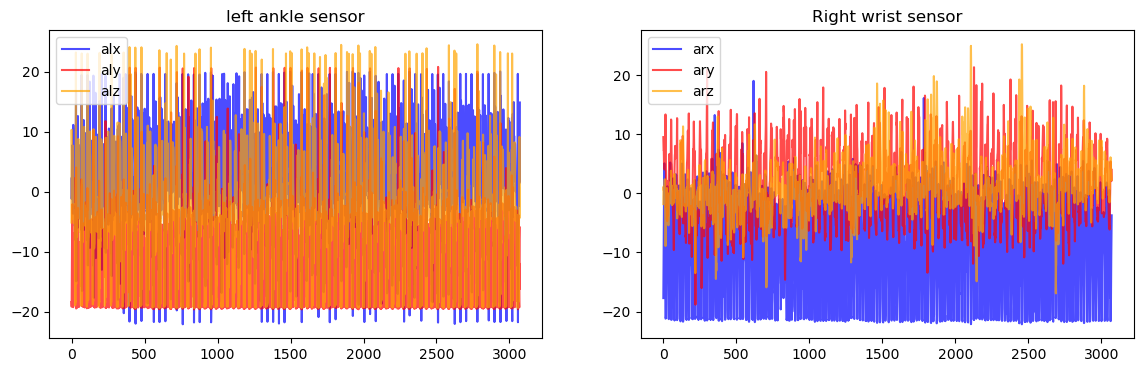

===========================================================  Jogging (1 min) - g===========================================================


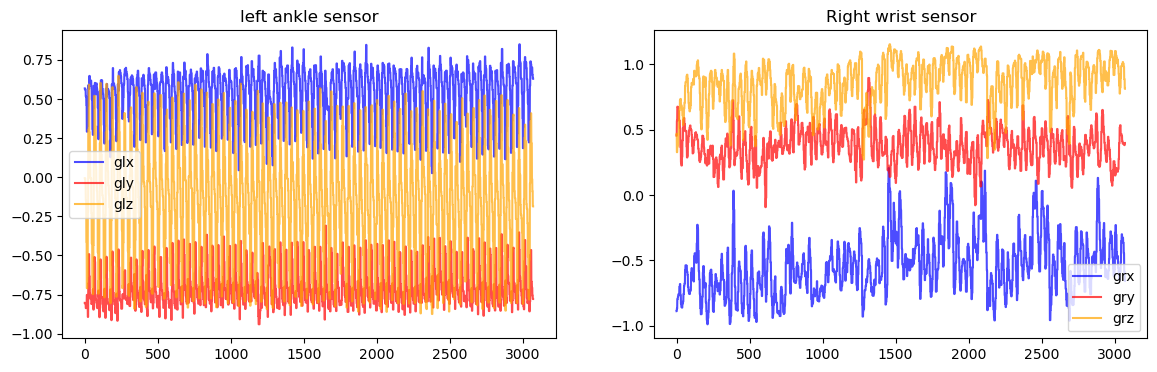

===========================================================  Running (1 min) - a===========================================================


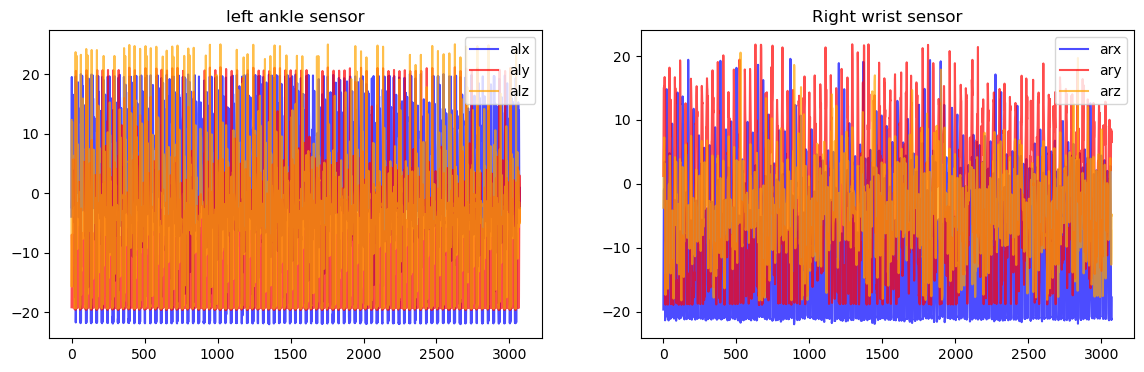

===========================================================  Running (1 min) - g===========================================================


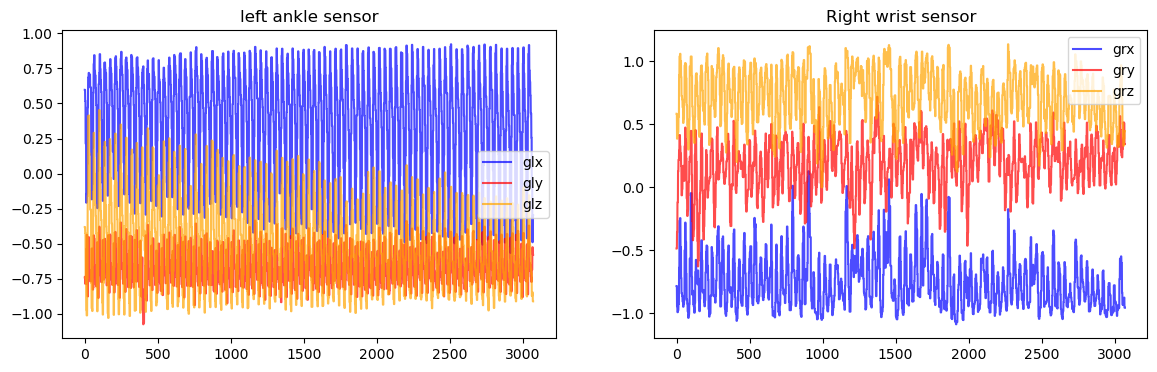

===========================================================  Jump front & back (20x) - a===========================================================


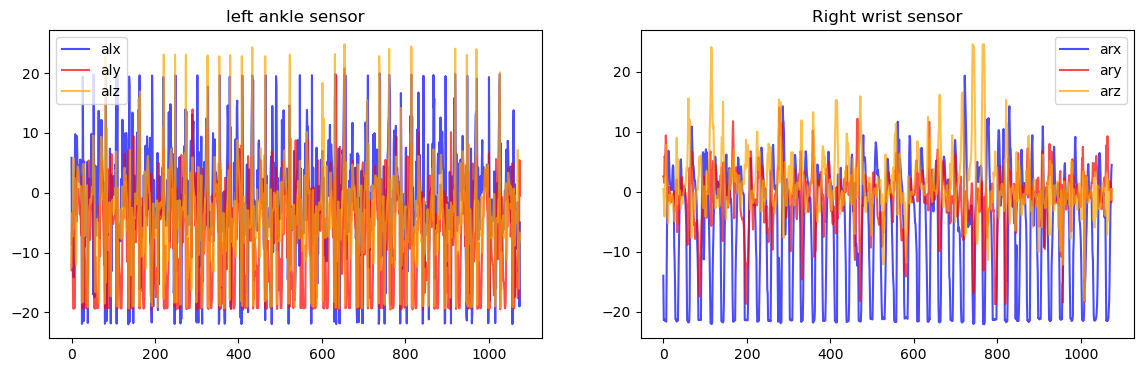

===========================================================  Jump front & back (20x) - g===========================================================


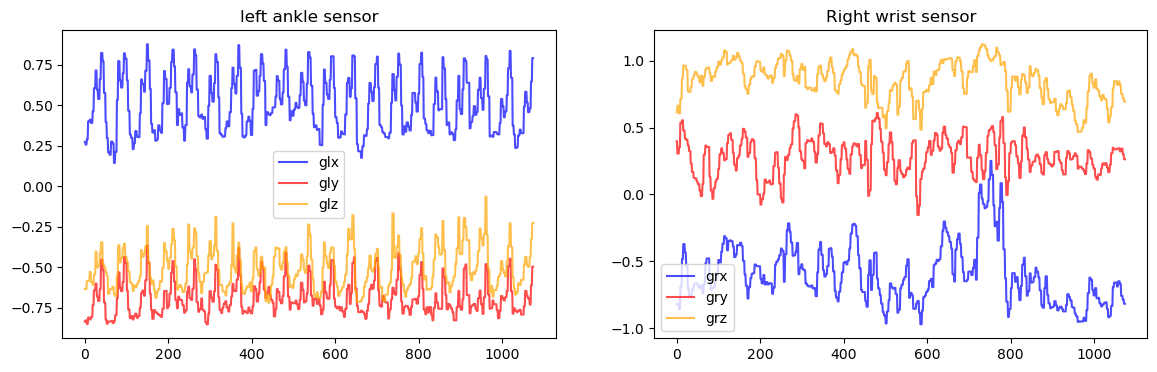

In [18]:
subject1 = df[df["subject"]== "subject1"]
readings= ["a", "g"]

for i in range(1,13):
    for r in readings:
        print(f"=========================================================== {activity_label[i]} - {r}===========================================================")
        plt.figure(figsize=(14,4))
        plt.subplot(1,2,1)
        plt.plot(subject1[subject1['Activity']==i].reset_index(drop=True)[r+"lx"],
                 color ='blue',alpha=0.7,label =r+"lx")
        plt.plot(subject1[subject1['Activity']==i].reset_index(drop=True)[r+"ly"],
                 color ='red',alpha=0.7,label =r+"ly")
        plt.plot(subject1[subject1['Activity']==i].reset_index(drop=True)[r+"lz"],
                 color ='orange',alpha=0.7,label =r+"lz")
        plt.title("left ankle sensor")
        plt.legend()

        plt.subplot(1,2,2)
        plt.plot(subject1[subject1['Activity']==i].reset_index(drop=True)[r+"rx"],
                 color ='blue',alpha=0.7,label =r+"rx")
        plt.plot(subject1[subject1['Activity']==i].reset_index(drop=True)[r+"ry"],
                 color ='red',alpha=0.7,label =r+"ry")
        plt.plot(subject1[subject1['Activity']==i].reset_index(drop=True)[r+"rz"],
                 color ='orange',alpha=0.7,label =r+"rz")
        plt.title("Right wrist sensor")
        plt.legend()
        plt.show()

===========================================================  Standing still (1 min) - a  ===========================================================


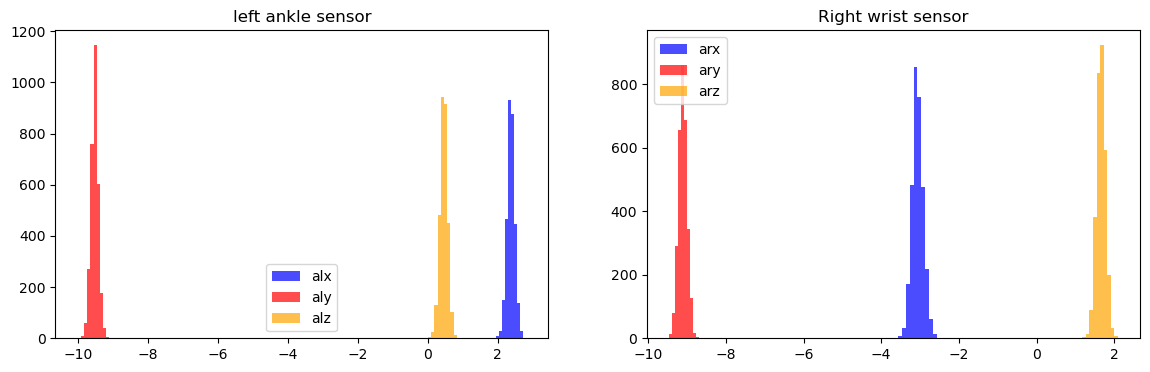

===========================================================  Standing still (1 min) - g  ===========================================================


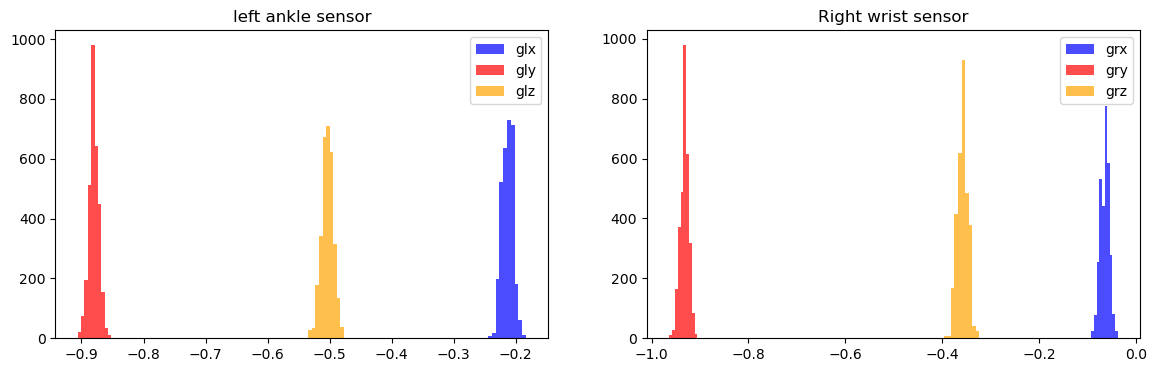

===========================================================  Sitting and relaxing (1 min) - a  ===========================================================


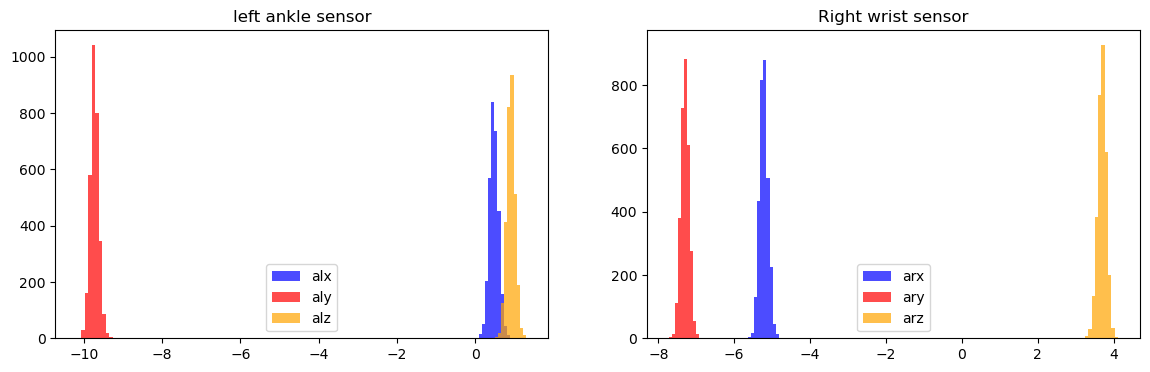

===========================================================  Sitting and relaxing (1 min) - g  ===========================================================


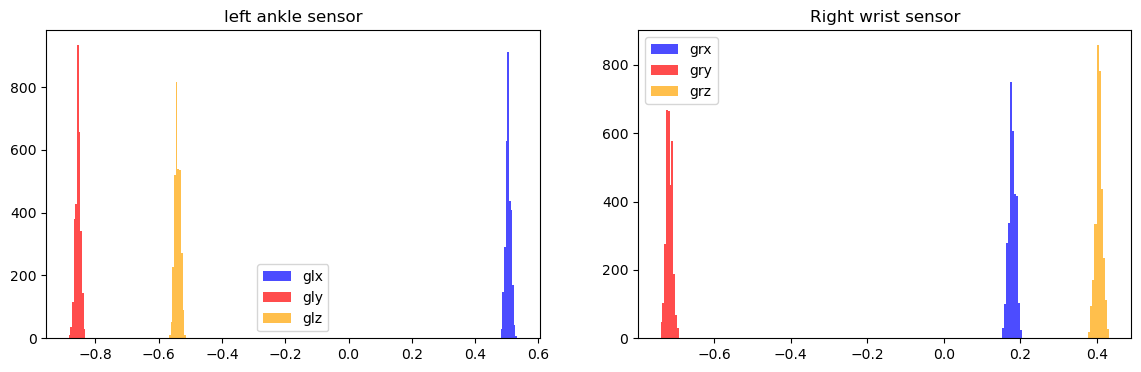

===========================================================  Lying down (1 min) - a  ===========================================================


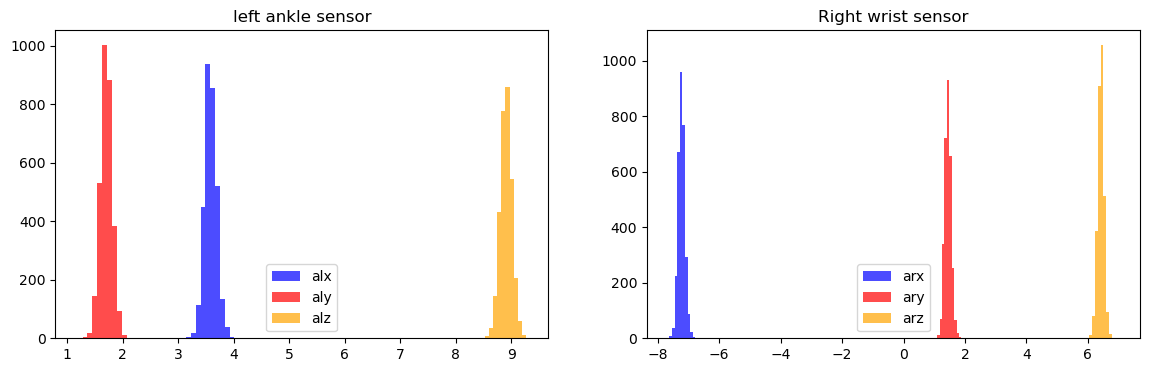

===========================================================  Lying down (1 min) - g  ===========================================================


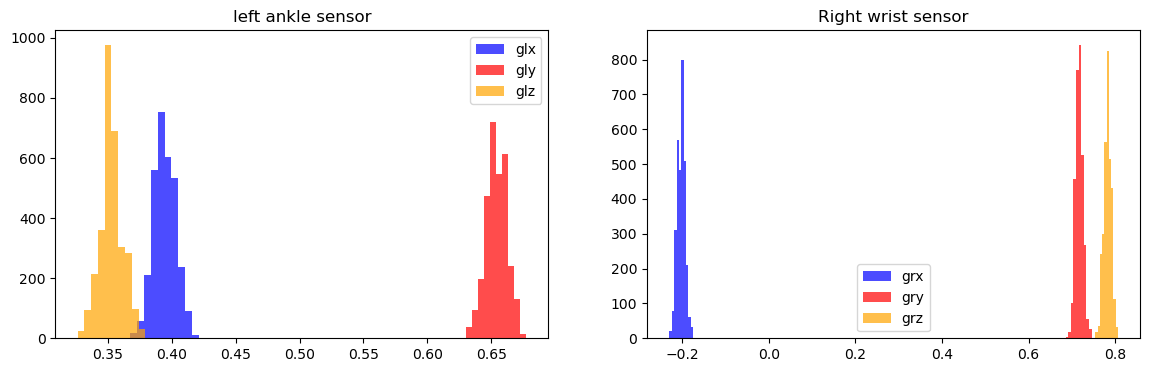

===========================================================  Walking (1 min) - a  ===========================================================


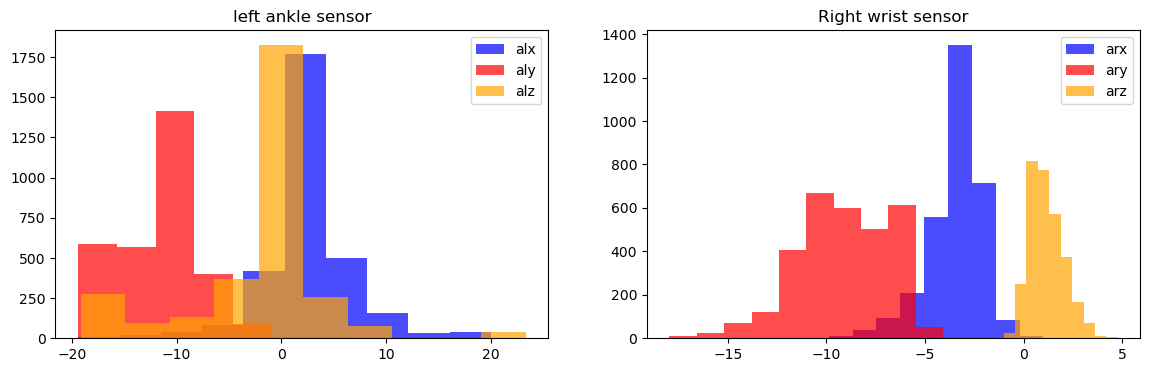

===========================================================  Walking (1 min) - g  ===========================================================


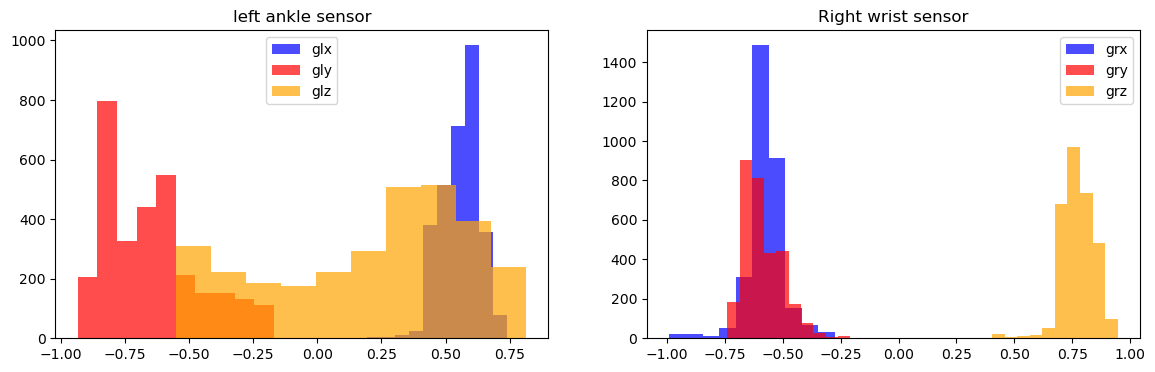

===========================================================  Climbing stairs (1 min) - a  ===========================================================


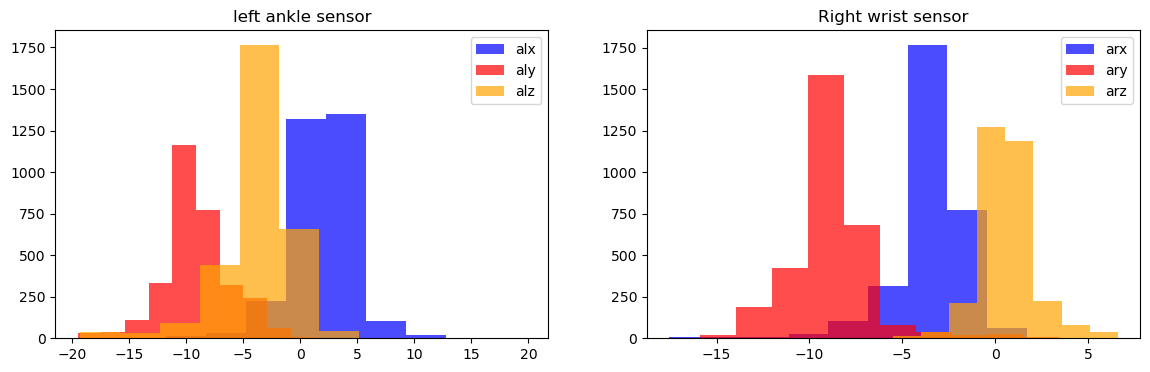

===========================================================  Climbing stairs (1 min) - g  ===========================================================


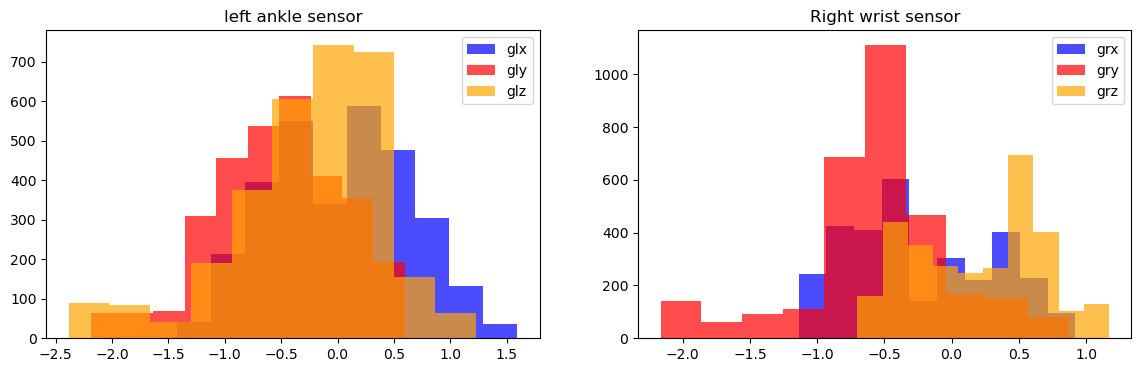

===========================================================  Waist bends forward (20x) - a  ===========================================================


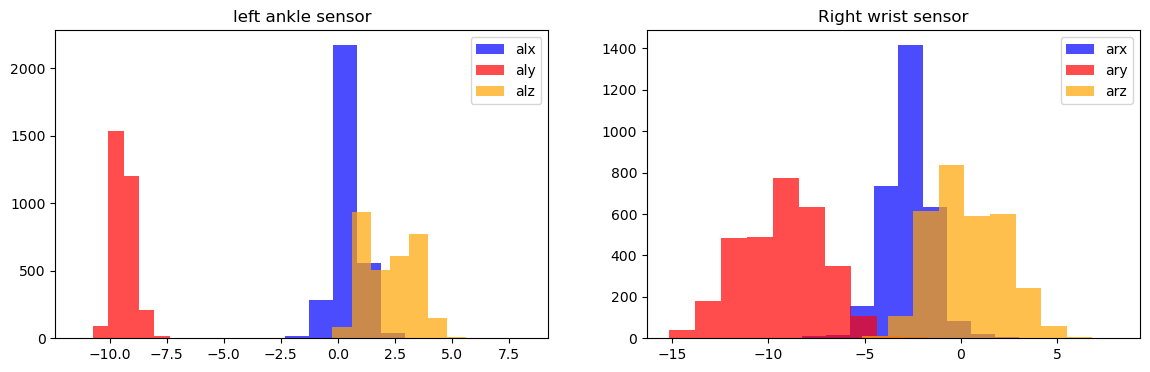

===========================================================  Waist bends forward (20x) - g  ===========================================================


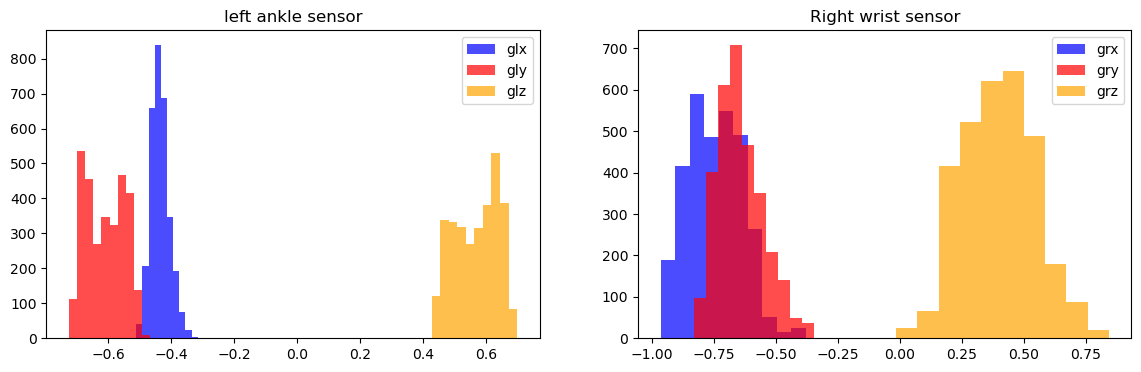

===========================================================  Frontal elevation of arms (20x) - a  ===========================================================


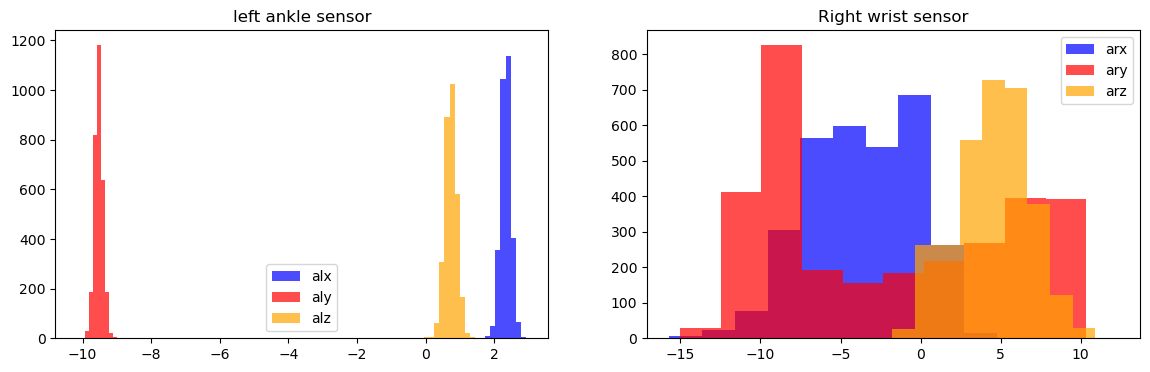

===========================================================  Frontal elevation of arms (20x) - g  ===========================================================


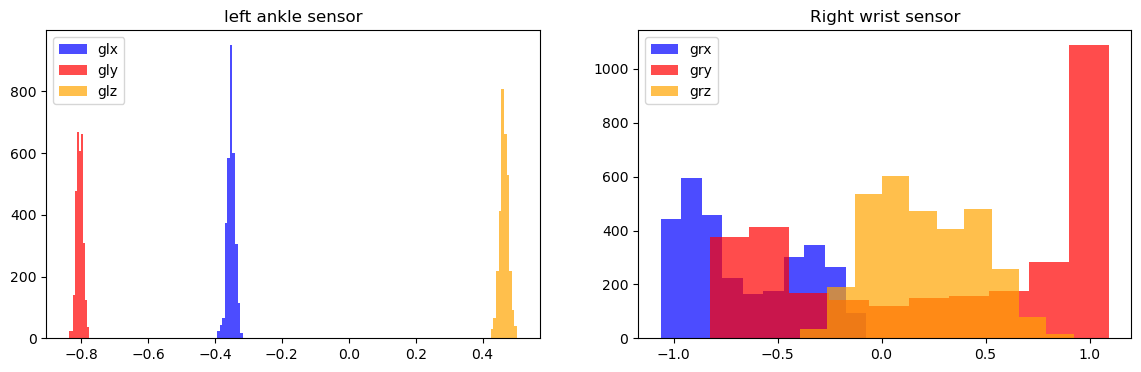

===========================================================  Knees bending (crouching) (20x) - a  ===========================================================


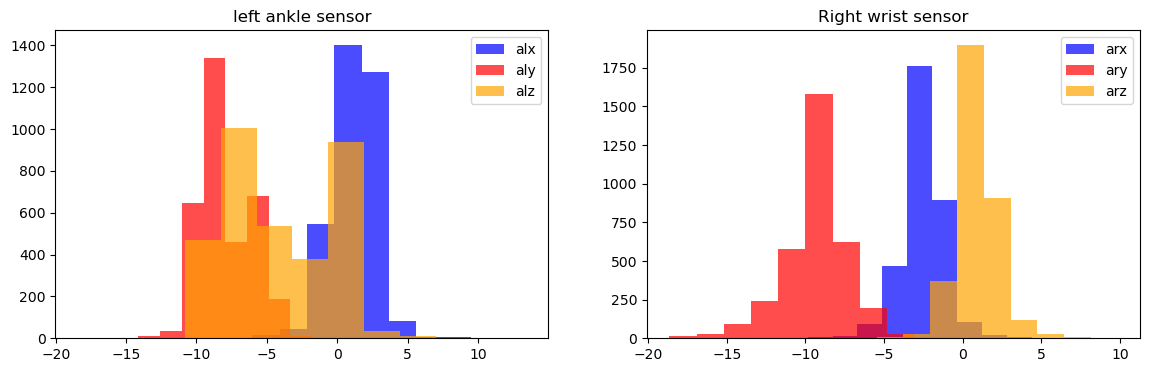

===========================================================  Knees bending (crouching) (20x) - g  ===========================================================


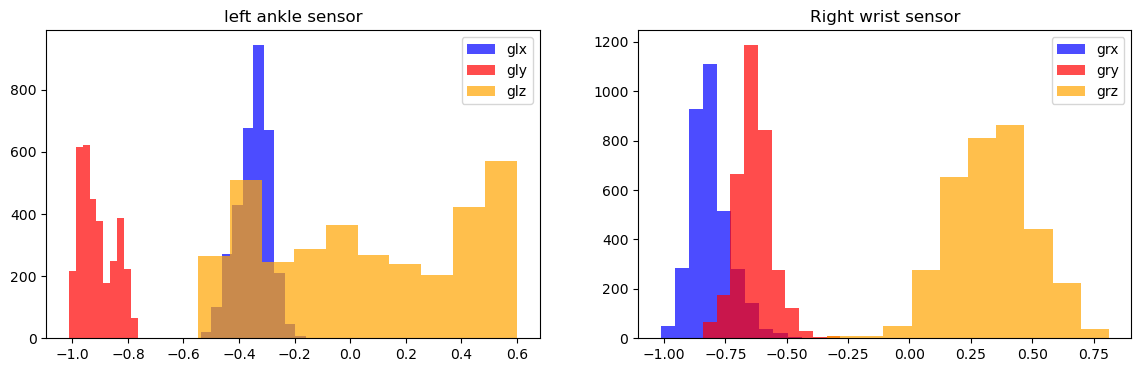

===========================================================  Cycling (1 min) - a  ===========================================================


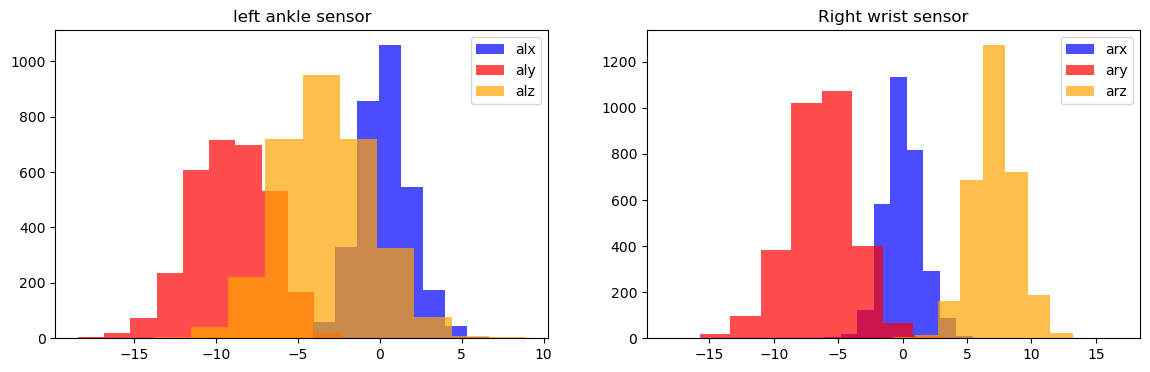

===========================================================  Cycling (1 min) - g  ===========================================================


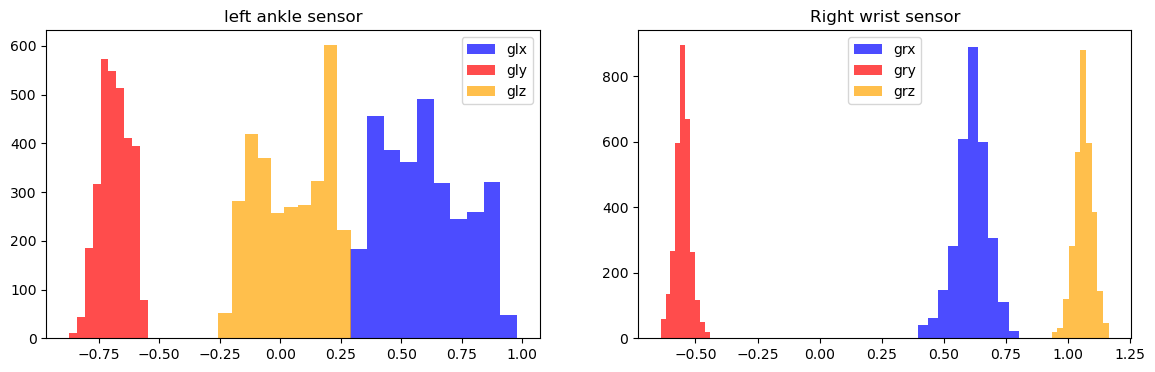

===========================================================   Jogging (1 min) - a  ===========================================================


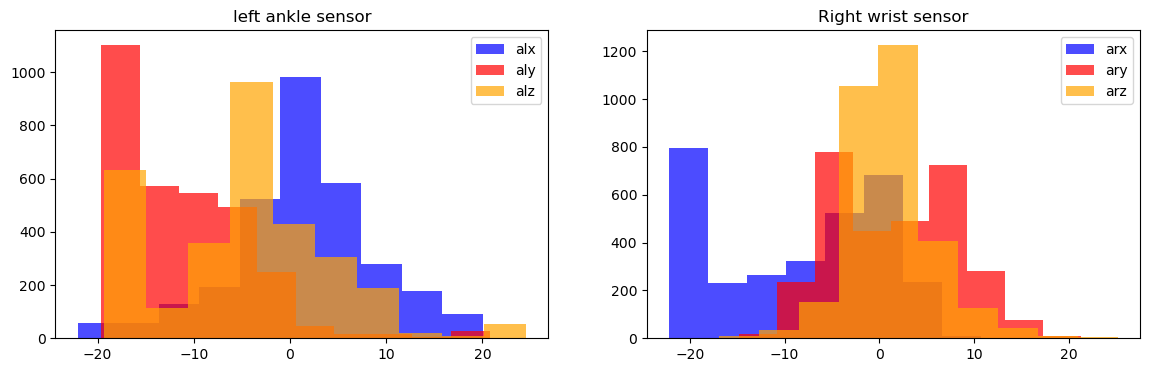

===========================================================   Jogging (1 min) - g  ===========================================================


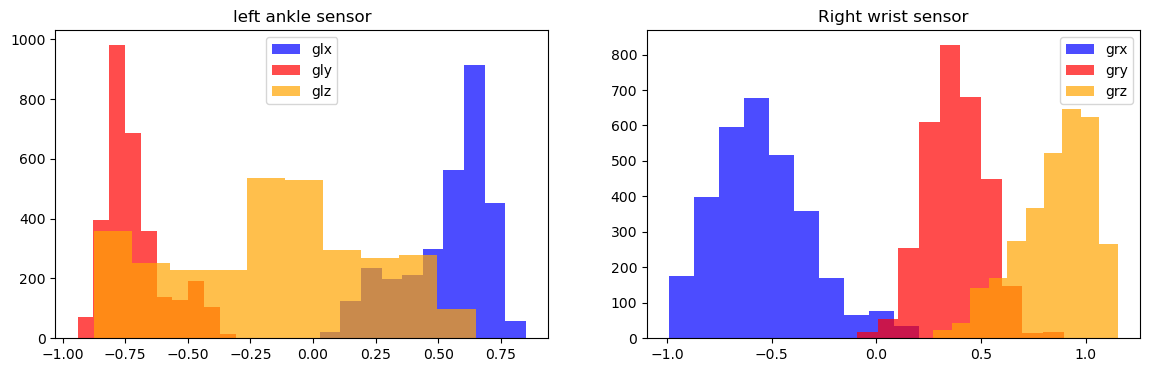

===========================================================   Running (1 min) - a  ===========================================================


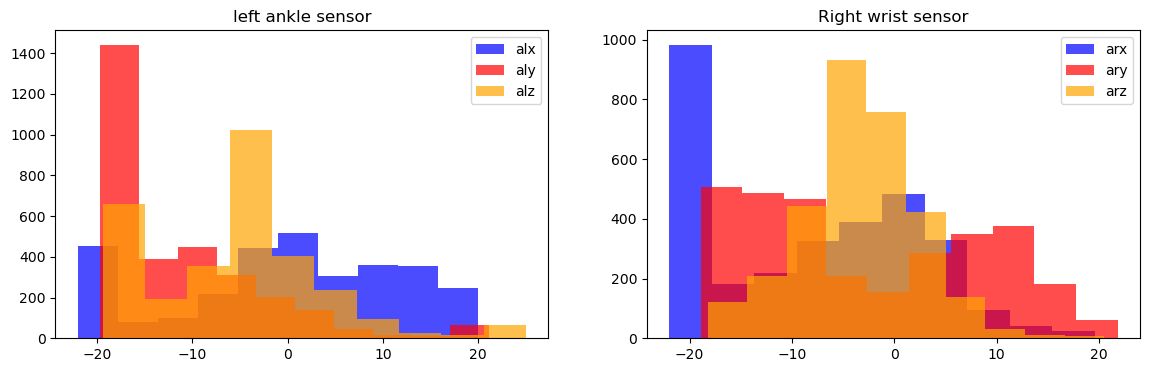

===========================================================   Running (1 min) - g  ===========================================================


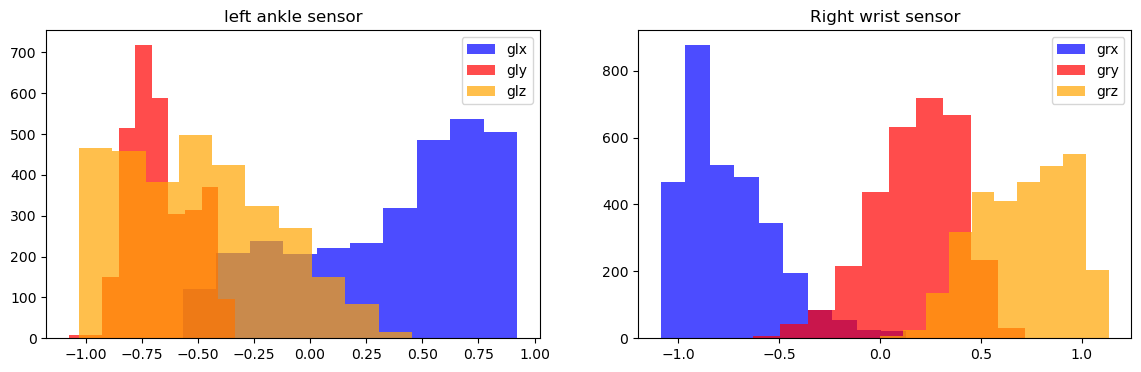

===========================================================   Jump front & back (20x) - a  ===========================================================


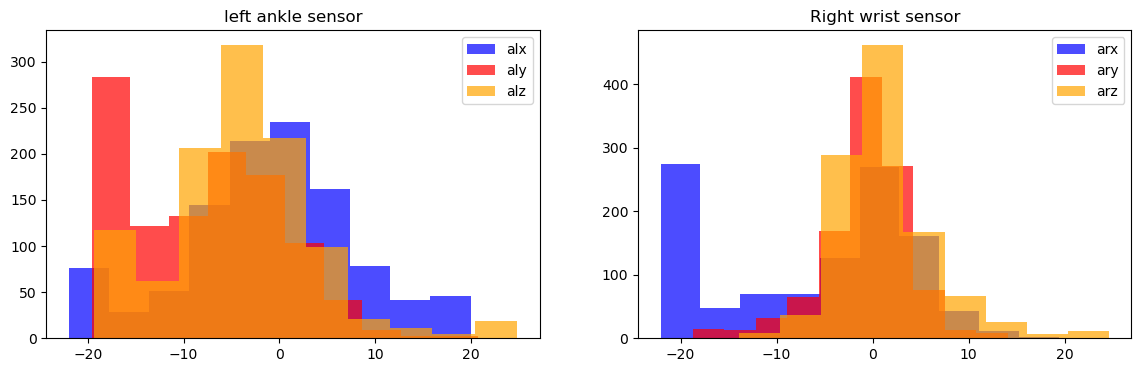

===========================================================   Jump front & back (20x) - g  ===========================================================


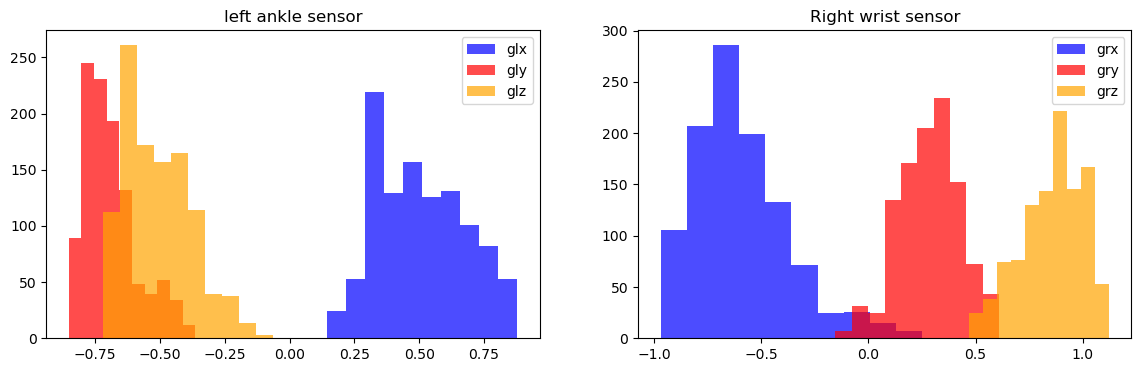

In [19]:
subject1 = df[df["subject"]== "subject1"]
readings= ["a", "g"]

for i in range(1,13):
    for r in readings:
        print(f"===========================================================  {activity_label[i]} - {r}  ===========================================================")
        plt.figure(figsize=(14,4))
        plt.subplot(1,2,1)
        plt.hist(subject1[subject1['Activity']==i].reset_index(drop=True)[r+"lx"],
                 color ='blue',alpha=0.7,label =r+"lx")
        plt.hist(subject1[subject1['Activity']==i].reset_index(drop=True)[r+"ly"],
                 color ='red',alpha=0.7,label =r+"ly")
        plt.hist(subject1[subject1['Activity']==i].reset_index(drop=True)[r+"lz"],
                 color ='orange',alpha=0.7,label =r+"lz")
        plt.title("left ankle sensor")
        plt.legend()

        plt.subplot(1,2,2)
        plt.hist(subject1[subject1['Activity']==i].reset_index(drop=True)[r+"rx"],
                 color ='blue',alpha=0.7,label =r+"rx")
        plt.hist(subject1[subject1['Activity']==i].reset_index(drop=True)[r+"ry"],
                 color ='red',alpha=0.7,label =r+"ry")
        plt.hist(subject1[subject1['Activity']==i].reset_index(drop=True)[r+"rz"],
                 color ='orange',alpha=0.7,label =r+"rz")
        plt.title("Right wrist sensor")
        plt.legend()
        plt.show()

In [20]:
df["Activity"]=df["Activity"].replace([0,1,2,3,4,5,6,7,8,9,10,11,12],
                                      ["None",
                                       "Standing still (1 min)",
                                       "Sitting and relaxing (1 min)",
                                       "Lying down (1 min)",
                                       "Walking (1 min)",
                                       "Climbing stairs (1 min)",
                                       "Waist bends forward (20x)",
                                       "Frontal elevation of arms (20x)",
                                       "Knees bending (crouching) (20x)",
                                       "Cycling (1 min)",
                                       " Jogging (1 min)",
                                       " Running (1 min)",
                                       " Jump front & back (20x)",])

In [21]:
df["Activity"]

179742                         None
147                            None
501193                         None
1050614                        None
667190                         None
                     ...           
1213641     Jump front & back (20x)
1213642     Jump front & back (20x)
1213643     Jump front & back (20x)
1213644     Jump front & back (20x)
1213645     Jump front & back (20x)
Name: Activity, Length: 383195, dtype: object

In [22]:
df.Activity.value_counts()

Activity
None                               40000
Standing still (1 min)             30720
Sitting and relaxing (1 min)       30720
Lying down (1 min)                 30720
Walking (1 min)                    30720
Cycling (1 min)                    30720
 Jogging (1 min)                   30720
 Running (1 min)                   30720
Climbing stairs (1 min)            30720
Frontal elevation of arms (20x)    29441
Knees bending (crouching) (20x)    29337
Waist bends forward (20x)          28315
 Jump front & back (20x)           10342
Name: count, dtype: int64

<Axes: ylabel='count'>

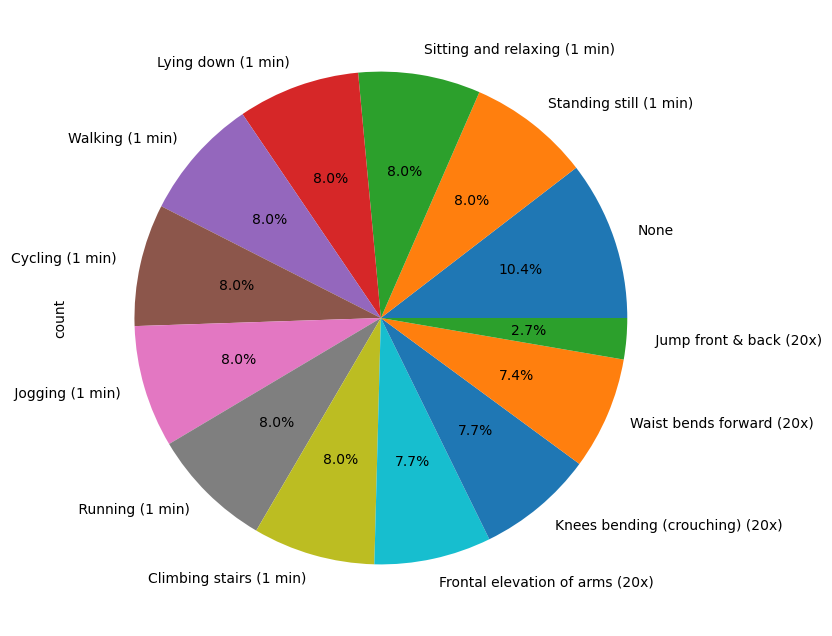

In [23]:
plt.figure(figsize = (12,8))
round(df["Activity"].value_counts()/df.shape[0]*100,2).plot.pie(autopct="%2.1f%%")

In [24]:
df1=df.copy()

for feature in df1.columns[:-2]:
    lower_range =np.quantile(df[feature], 0.01)
    upper_range =np.quantile(df[feature], 0.99)
    print(feature ,"range:" ,lower_range, "to" ,upper_range)

    df1 = df1.drop(df1[(df1[feature]> upper_range) | (df1[feature]< lower_range)].index, axis=0)
    print("shape",df1.shape)

alx range: -11.45112 to 19.223
shape (375545, 14)
aly range: -19.378 to 2.3783839999999965
shape (369629, 14)
alz range: -18.949 to 14.139
shape (365843, 14)
glx range: -0.75325 to 0.80891
shape (358819, 14)
gly range: -1.0694 to 0.96623
shape (352209, 14)
glz range: -1.1061 to 0.8290799999999999
shape (346542, 14)
arx range: -21.486 to 9.029385999999992
shape (341320, 14)
ary range: -18.691 to 11.828059999999997
shape (335102, 14)
arz range: -10.28218 to 11.754179999999993
shape (332417, 14)
grx range: -1.0216 to 0.95294
shape (328733, 14)
gry range: -1.1437 to 0.9117
shape (323692, 14)
grz range: -0.7069 to 1.125
shape (319058, 14)


In [25]:
df1

alx       aly       alz       glx      gly      glz      arx  \
179742   0.29858  -7.78840 -8.542700 -0.317250  0.66792  0.17485  -2.9024   
147      1.49360  -9.63440 -0.070949  0.044527 -0.80488 -0.74067  -9.0066   
501193  -0.30259  -9.05430  1.502600 -0.586270 -0.78424 -0.32220  -1.4562   
1050614  1.01340  -9.91470  0.608150 -0.430430 -0.84428 -0.46562  -2.6459   
667190   4.76740 -15.06600 -3.632700 -0.124300 -0.85178 -0.59725  -3.2993   
...          ...       ...       ...       ...      ...      ...      ...   
1213636 -0.19979  -0.93484  2.555400  0.630800 -0.52533 -0.67976  -4.0212   
1213637 -0.33315  -1.23710 -2.919400  0.638220 -0.42777 -0.74853  -2.2515   
1213640  6.77570 -15.07500  7.397400  0.619670 -0.33771 -0.82711  -2.2797   
1213641 -2.48730 -19.23300  3.461400  0.619670 -0.33771 -0.82711  -8.2348   
1213645 -2.36980 -19.30000 -4.238700  0.710580 -0.27017 -0.75442 -21.1730   

               ary      arz       grx       gry       grz  \
179742   -4.846400  1.36180 -0.674510  0.043121 -0.338360   
147      -3.938000  0.19893 -0.494120 -0.997950  0.032328   
501193   -6.878300  2.16650 -0.674510 -0.786450 -0.135780   
1050614  -9.267100  1.28660 -0.170590 -0.958930 -0.504310   
667190   -8.133100  0.68709  0.056863 -1.067800 -0.228450   
...            ...      ...       ...       ...       ...   
1213636  -0.082645  0.73545 -0.458820 -1.000000  0.122840   
1213637  -0.414790  0.52093 -0.417650 -1.037000  0.088362   
1213640  -2.358900  2.11120 -0.417650 -1.037000  0.088362   
1213641  -4.965200  2.48090 -0.437250 -1.018500  0.079741   
1213645 -14.291000 -0.13123 -0.425490 -1.037000  0.084052   

                         Activity    subject  
179742                       None   subject2  
147                          None   subject1  
501193                       None   subject4  
1050614                      None   subject9  
667190                       None   subject6  
...                           ...        ...  
1213636   Jump front & back (20x)  subject10  
1213637   Jump front & back (20x)  subject10  
1213640   Jump front & back (20x)  subject10  
1213641   Jump front & back (20x)  subject10  
1213645   Jump front & back (20x)  subject10  

[319058 rows x 14 columns]

In [26]:
# Data preprocessing

le = LabelEncoder()
df["subject"] = le.fit_transform(df["subject"])

In [27]:
df["Activity"] = le.fit_transform(df["Activity"])

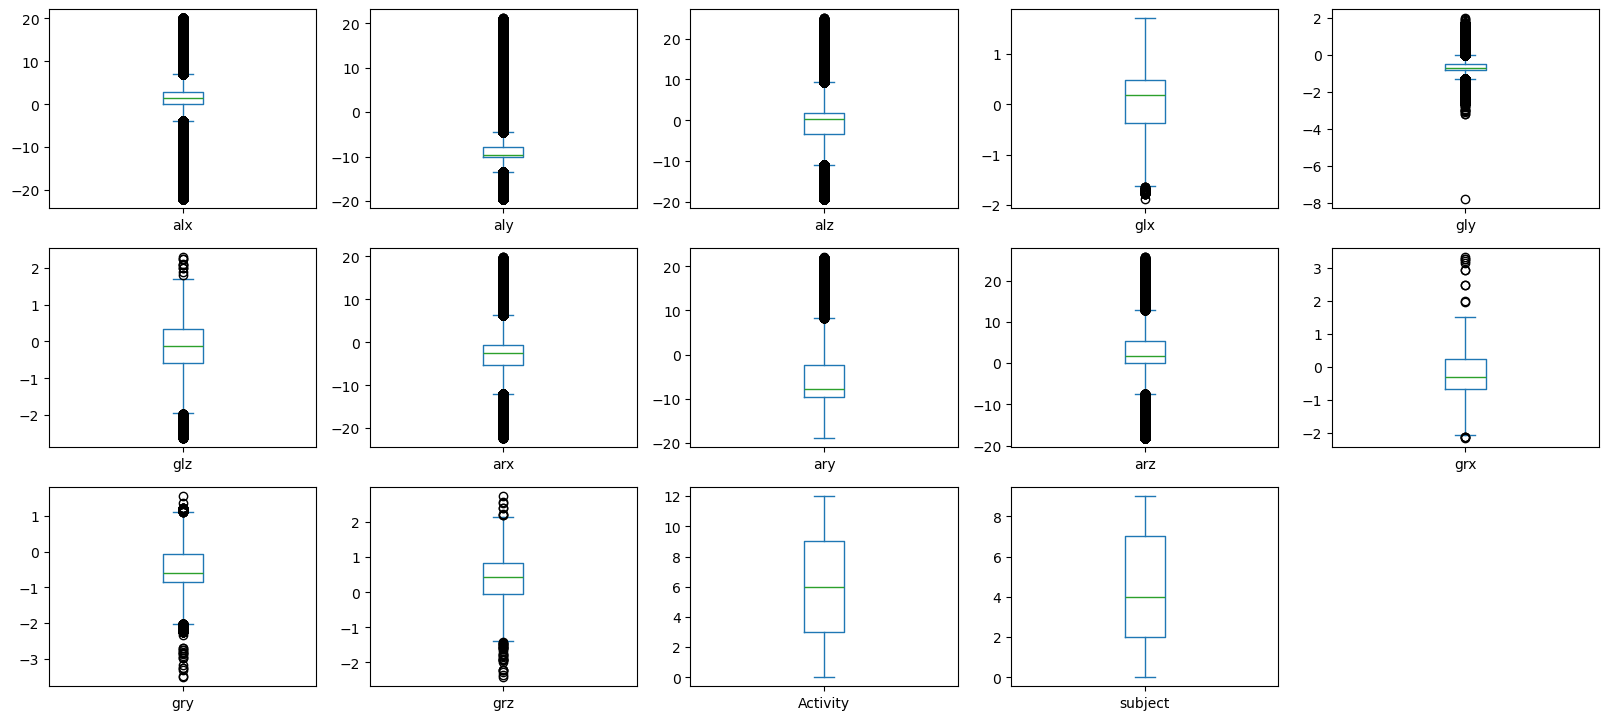

In [28]:
df.plot(kind="box", subplots = True ,layout =(5,5),figsize =(20,15))
plt.show()

In [29]:
x = df.drop(["Activity" , "subject"], axis=1).values
y =  df["Activity"].values

In [30]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.25)

In [31]:
ro_scaler = RobustScaler().fit(x_train)
x_train_scaled = ro_scaler.transform(x_train)
x_test_scaled = ro_scaler.transform(x_test)


#  Building Model

In [33]:
def resultsSummarizer(y_true,y_pred,cm_em = True):
    cm = confusion_matrix(y_true,y_pred)
    acc = accuracy_score(y_true,y_pred)
    prec =precision_score(y_true,y_pred,average ='macro')
    rec = senitivity = recall_score(y_true,y_pred,average='macro')
    f1 =f1_score(y_true,y_pred,average='macro')

    if cm_em:
        plt.figure(figsize =(15,15))
        sns.heatmap(cm, annot = True, cmap = "Blues",xticklabels=activity_label.values(),yticklabels=activity_label.values())
        plt.title("Confussion Matrix")
        plt.show()

    print(classification_report(y_true,y_pred))
    print(f"Accuricy Score" + "{:.4%}".format(acc))
    print(f"Precision Score" + "{:.4%}".format(prec))
    print(f"Recall Score" + "{:.4%}".format(rec))
    print(f"f1 Score" + "{:.4%}".format(f1))
    

# 1. Logistic Regrassion

In [99]:
lr = LogisticRegression()  # lr = LogisticRegression(max_iter = 1000)
lr.fit(x_train,y_train)

C:\Users\dilip\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
lr.score(x_test,y_test)

0.5492750446246829

In [37]:
lr.score(x_train,y_train)


0.5503625659368955

In [38]:
lr2 = LogisticRegression(max_iter = 1000)   #lr2 = LogisticRegression(max_iter=1000)
lr2.fit(x_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [39]:
lr2.score(x_train_scaled,y_train)

0.5505539395120321

In [40]:
lr2.score(x_test_scaled,y_test)

0.5495673232497208

In [41]:
y_pred_lr = lr2.predict(x_test_scaled)

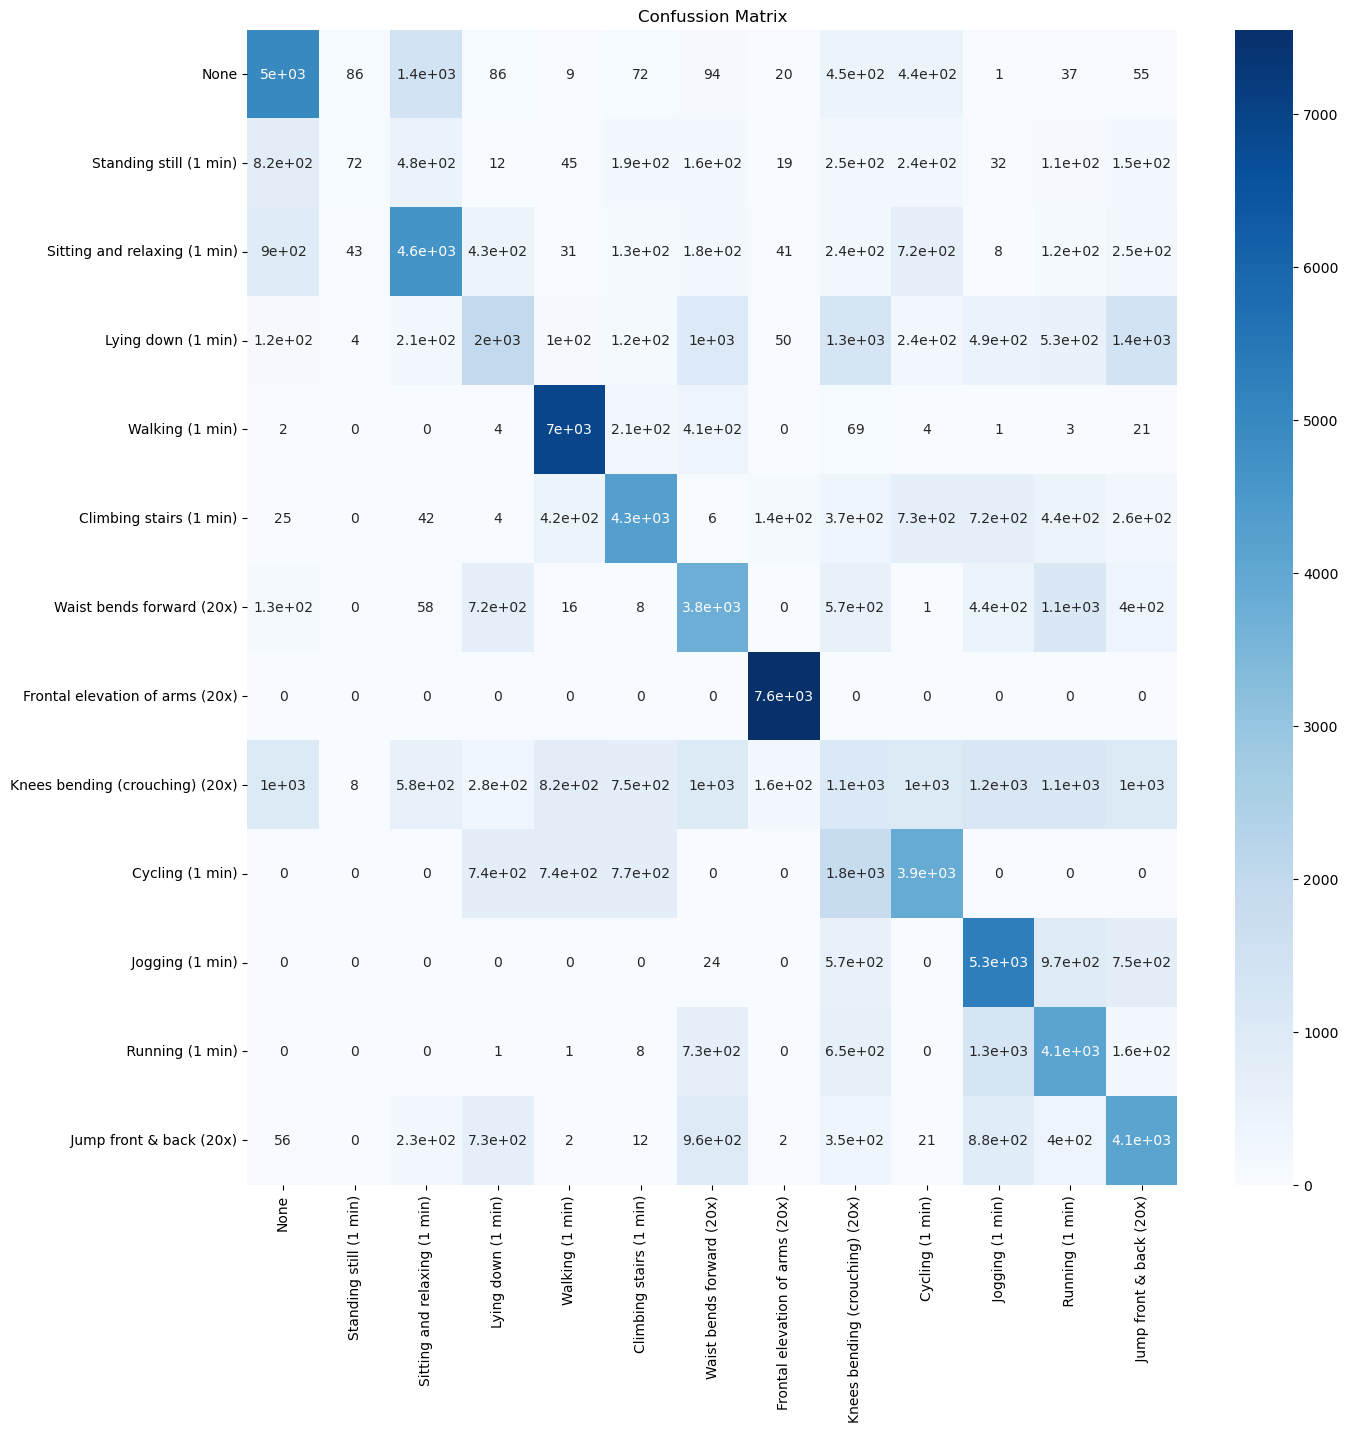

              precision    recall  f1-score   support

           0       0.62      0.64      0.63      7730
           1       0.34      0.03      0.05      2578
           2       0.61      0.60      0.60      7715
           3       0.40      0.26      0.31      7602
           4       0.76      0.91      0.83      7675
           5       0.65      0.58      0.61      7418
           6       0.45      0.52      0.48      7193
           7       0.95      1.00      0.97      7552
           8       0.14      0.11      0.12     10021
           9       0.53      0.49      0.51      7949
          10       0.51      0.69      0.59      7609
          11       0.46      0.59      0.52      7016
          12       0.48      0.53      0.50      7741

    accuracy                           0.55     95799
   macro avg       0.53      0.53      0.52     95799
weighted avg       0.53      0.55      0.53     95799

Accuricy Score54.9567%
Precision Score52.9735%
Recall Score53.4094%
f1 Score51.

In [42]:
resultsSummarizer(y_test,y_pred_lr)

In [43]:
len(x_test_scaled)

95799

  #  KNN

In [45]:
knn1 = KNeighborsClassifier(n_neighbors = 5)
knn1.fit(x_train,y_train)

KNeighborsClassifier()

In [46]:
y_pred_knn = knn1.predict(x_test)

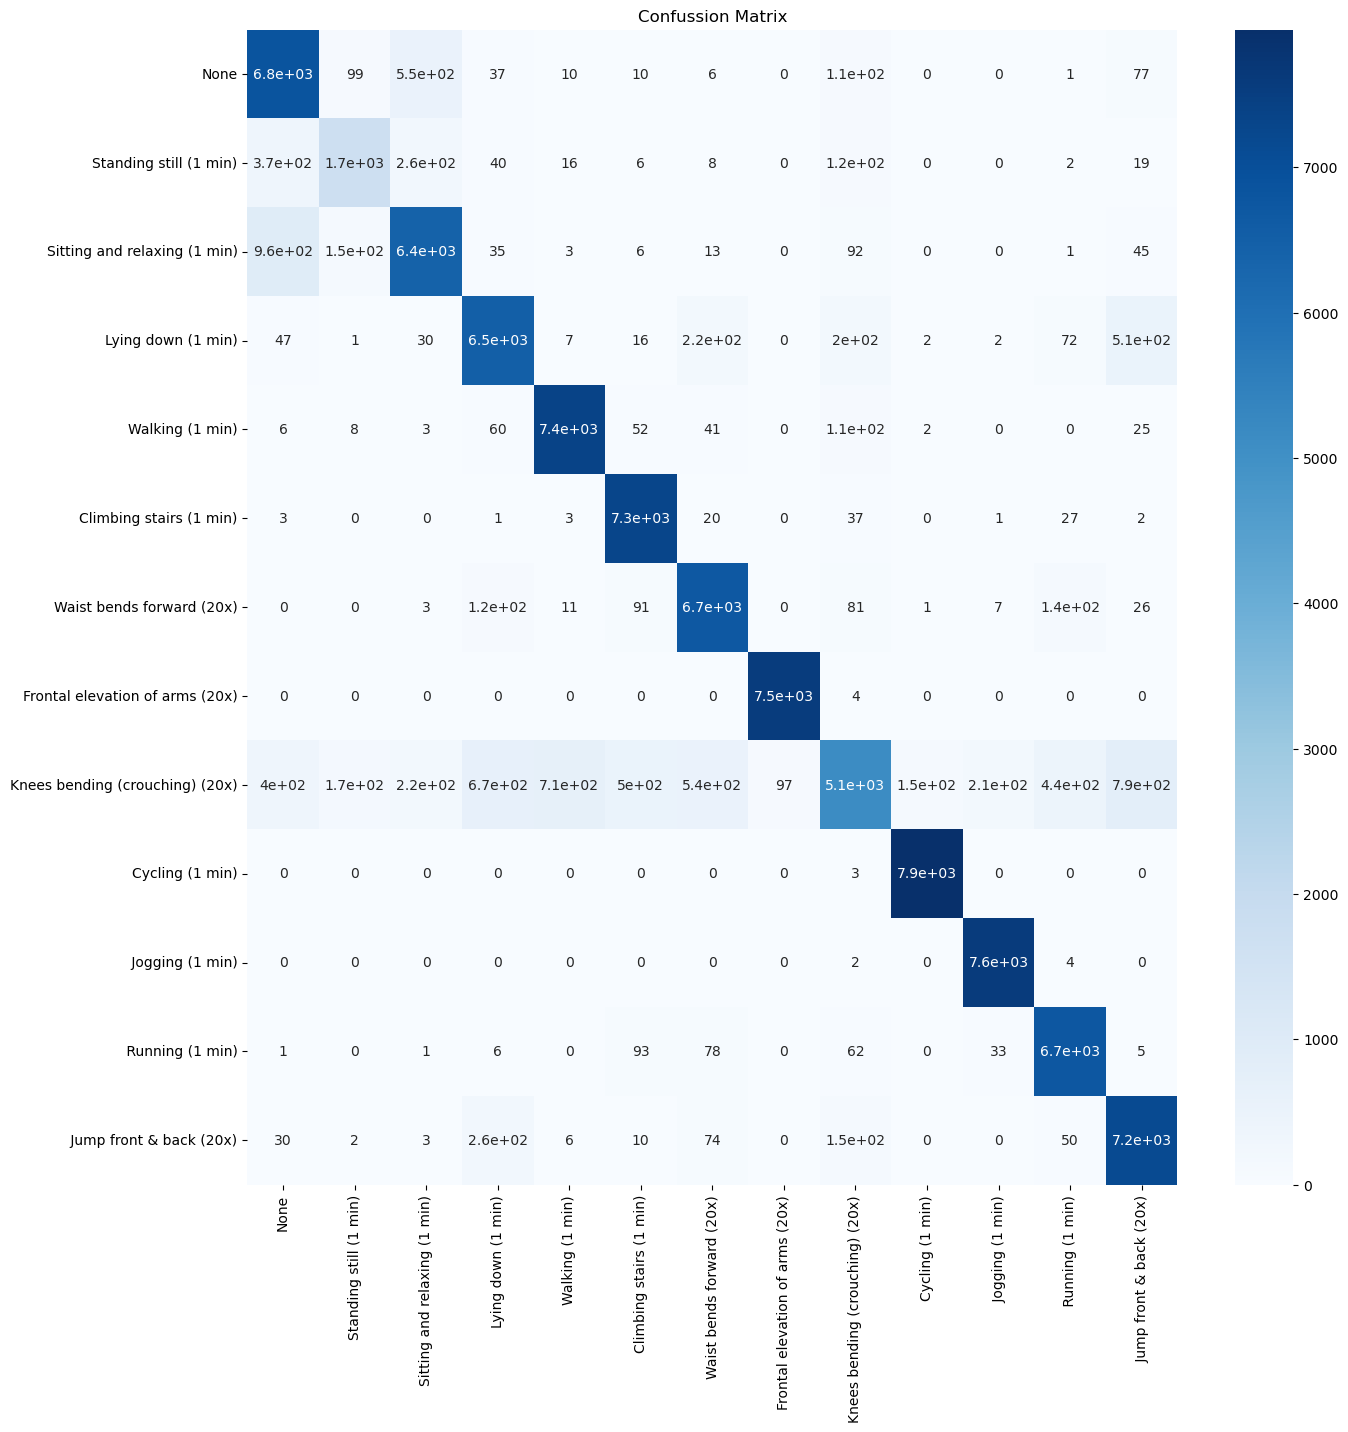

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      7730
           1       0.80      0.67      0.73      2578
           2       0.86      0.83      0.84      7715
           3       0.84      0.86      0.85      7602
           4       0.91      0.96      0.93      7675
           5       0.90      0.99      0.94      7418
           6       0.87      0.93      0.90      7193
           7       0.99      1.00      0.99      7552
           8       0.84      0.51      0.64     10021
           9       0.98      1.00      0.99      7949
          10       0.97      1.00      0.98      7609
          11       0.90      0.96      0.93      7016
          12       0.83      0.92      0.87      7741

    accuracy                           0.89     95799
   macro avg       0.88      0.89      0.88     95799
weighted avg       0.89      0.89      0.88     95799

Accuricy Score88.7327%
Precision Score88.2690%
Recall Score88.6060%
f1 Score88.

In [47]:
resultsSummarizer(y_test,y_pred_knn)

In [48]:
knn2 = KNeighborsClassifier(n_neighbors = 5)
knn2.fit(x_train,y_train)
y_pred_knn2 = knn2.predict(x_test) 


In [49]:
resultsSummarizer(y_test,y_pred_knn2,cm_em=False)


              precision    recall  f1-score   support

           0       0.79      0.88      0.83      7730
           1       0.80      0.67      0.73      2578
           2       0.86      0.83      0.84      7715
           3       0.84      0.86      0.85      7602
           4       0.91      0.96      0.93      7675
           5       0.90      0.99      0.94      7418
           6       0.87      0.93      0.90      7193
           7       0.99      1.00      0.99      7552
           8       0.84      0.51      0.64     10021
           9       0.98      1.00      0.99      7949
          10       0.97      1.00      0.98      7609
          11       0.90      0.96      0.93      7016
          12       0.83      0.92      0.87      7741

    accuracy                           0.89     95799
   macro avg       0.88      0.89      0.88     95799
weighted avg       0.89      0.89      0.88     95799

Accuricy Score88.7327%
Precision Score88.2690%
Recall Score88.6060%
f1 Score88.

In [ ]:
for n in range(1,11):
     knn = KNeighborsClassifier(n_neighbors = n)
     knn.fit(x_train,y_train)
     y_pred = knn.predict(x_test_scaled)
     print("\n========================  No  of  Neighbors (n) ======================\n")
     resultsSummarizer(y_test,y_pred,cm_em=False)
    


========================  No  of  Neighbors (n) ======================



C:\Users\dilip\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dilip\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dilip\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dilip\anaconda3\Lib\site-packag

              precision    recall  f1-score   support

           0       0.24      0.05      0.08      7730
           1       0.03      0.85      0.05      2578
           2       0.51      0.01      0.01      7715
           3       0.00      0.00      0.00      7602
           4       0.00      0.00      0.00      7675
           5       0.00      0.00      0.00      7418
           6       0.00      0.00      0.00      7193
           7       0.00      0.00      0.00      7552
           8       0.13      0.17      0.14     10021
           9       0.00      0.00      0.00      7949
          10       0.00      0.00      0.00      7609
          11       0.00      0.00      0.00      7016
          12       0.00      0.00      0.00      7741

    accuracy                           0.04     95799
   macro avg       0.07      0.08      0.02     95799
weighted avg       0.07      0.04      0.02     95799

Accuricy Score4.4656%
Precision Score6.9931%
Recall Score8.2200%
f1 Score2.2472

C:\Users\dilip\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dilip\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dilip\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dilip\anaconda3\Lib\site-packag

              precision    recall  f1-score   support

           0       0.26      0.08      0.12      7730
           1       0.03      0.92      0.05      2578
           2       0.53      0.00      0.00      7715
           3       0.00      0.00      0.00      7602
           4       0.00      0.00      0.00      7675
           5       0.00      0.00      0.00      7418
           6       0.00      0.00      0.00      7193
           7       0.00      0.00      0.00      7552
           8       0.19      0.01      0.02     10021
           9       0.00      0.00      0.00      7949
          10       0.00      0.00      0.00      7609
          11       0.00      0.00      0.00      7016
          12       0.00      0.00      0.00      7741

    accuracy                           0.03     95799
   macro avg       0.08      0.08      0.01     95799
weighted avg       0.08      0.03      0.01     95799

Accuricy Score3.2328%
Precision Score7.7657%
Recall Score7.7560%
f1 Score1.4987

C:\Users\dilip\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dilip\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dilip\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dilip\anaconda3\Lib\site-packag

              precision    recall  f1-score   support

           0       0.17      0.03      0.05      7730
           1       0.03      0.92      0.05      2578
           2       0.78      0.00      0.01      7715
           3       0.00      0.00      0.00      7602
           4       0.00      0.00      0.00      7675
           5       0.00      0.00      0.00      7418
           6       0.00      0.00      0.00      7193
           7       0.00      0.00      0.00      7552
           8       0.17      0.02      0.04     10021
           9       0.00      0.00      0.00      7949
          10       0.00      0.00      0.00      7609
          11       0.00      0.00      0.00      7016
          12       0.00      0.00      0.00      7741

    accuracy                           0.03     95799
   macro avg       0.09      0.07      0.01     95799
weighted avg       0.09      0.03      0.01     95799

Accuricy Score2.9583%
Precision Score8.7832%
Recall Score7.4637%
f1 Score1.1118

C:\Users\dilip\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dilip\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dilip\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dilip\anaconda3\Lib\site-packag

              precision    recall  f1-score   support

           0       0.18      0.04      0.06      7730
           1       0.03      0.94      0.05      2578
           2       0.79      0.00      0.00      7715
           3       0.00      0.00      0.00      7602
           4       0.00      0.00      0.00      7675
           5       0.00      0.00      0.00      7418
           6       0.00      0.00      0.00      7193
           7       0.00      0.00      0.00      7552
           8       0.05      0.00      0.00     10021
           9       0.00      0.00      0.00      7949
          10       0.00      0.00      0.00      7609
          11       0.00      0.00      0.00      7016
          12       0.00      0.00      0.00      7741

    accuracy                           0.03     95799
   macro avg       0.08      0.08      0.01     95799
weighted avg       0.08      0.03      0.01     95799

Accuricy Score2.8361%
Precision Score8.0946%
Recall Score7.5056%
f1 Score0.8913

C:\Users\dilip\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dilip\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dilip\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dilip\anaconda3\Lib\site-packag

              precision    recall  f1-score   support

           0       0.14      0.02      0.04      7730
           1       0.03      0.95      0.05      2578
           2       0.81      0.00      0.00      7715
           3       0.00      0.00      0.00      7602
           4       0.00      0.00      0.00      7675
           5       0.00      0.00      0.00      7418
           6       0.00      0.00      0.00      7193
           7       0.00      0.00      0.00      7552
           8       0.20      0.00      0.00     10021
           9       0.00      0.00      0.00      7949
          10       0.00      0.00      0.00      7609
          11       0.00      0.00      0.00      7016
          12       0.00      0.00      0.00      7741

    accuracy                           0.03     95799
   macro avg       0.09      0.07      0.01     95799
weighted avg       0.10      0.03      0.00     95799

Accuricy Score2.7516%
Precision Score9.0566%
Recall Score7.4727%
f1 Score0.7239

In [ ]:
dt = DecisionTreeClassifier(max_depth = 14)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
resultsSummarizer(y_test,y_pred_dt)